### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import tools
import model_egm_naive
import model_egm
from euler import calculate_euler_errors
from numba.types import double, int32
from numba.experimental import jitclass
from scipy.interpolate import interp1d
from model import run_model
from params import par_class
from scipy.stats import gaussian_kde

plt.style.use('science') # pip install git+https://github.com/garrettj403/SciencePlots.git

### Settings

In [2]:
fast = False
save = True
num_points = 24
dpi = 400

# Main figures

### Figure: No uncertainty

Fraction of early payments: 0.000


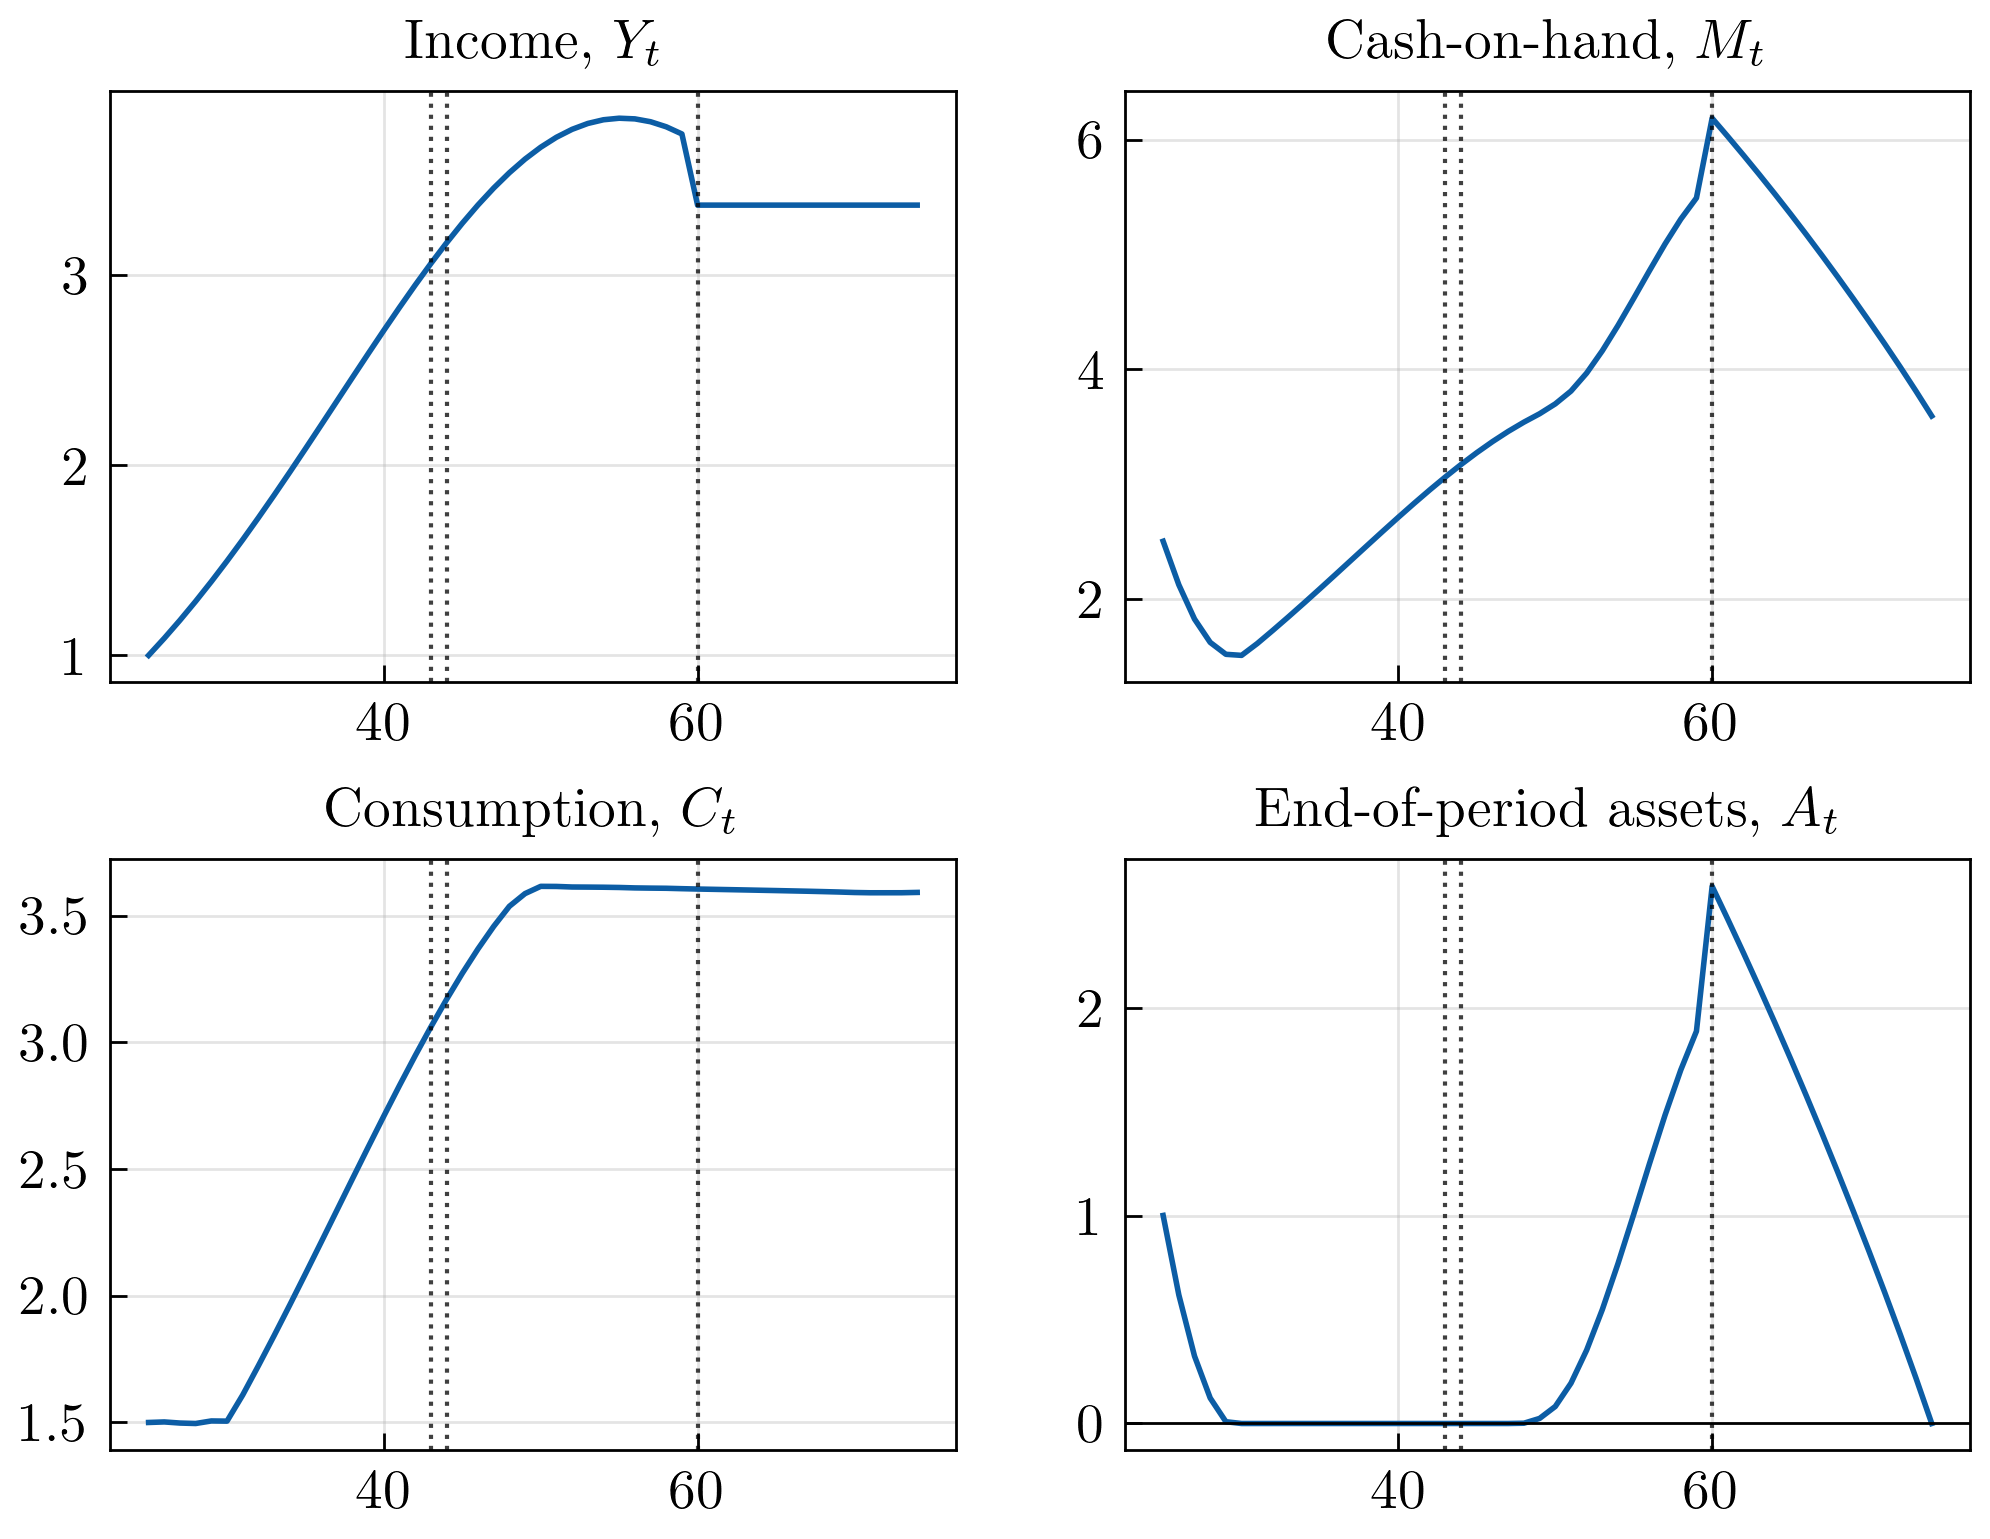

In [3]:
# Parameters
par = par_class()
par.pi = 0.0
par.sigma_d = 0.0
par.sigma_xi = 0.0
par.sigma_psi = 0.0
par.Nd = 1
par.Npsi = 1
par.Nxi = 1
par.simN = 1
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
sol, sim = run_model(par)

# Plot
fig,ax = plt.subplots(2,2,figsize=(6,4.5),dpi=dpi)
ax[0,0].plot(range(25,par.T+25), sim.Y.mean(axis=0))
ax[0,1].plot(range(25,par.T+25), sim.M.mean(axis=0))
ax[1,0].plot(range(25,par.T+25), sim.C.mean(axis=0))
ax[1,1].plot(range(25,par.T+25), sim.A.mean(axis=0))
ax[0,0].set_title('Income, $Y_t$', fontsize=10)
ax[0,1].set_title('Cash-on-hand, $M_t$', fontsize=10)
ax[1,0].set_title('Consumption, $C_t$', fontsize=10)
ax[1,1].set_title('End-of-period assets, $A_t$', fontsize=10)
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.3)
print(f'Fraction of early payments: {sim.z.mean():.3f}')
if save: plt.savefig(r'figs\fig_no_uncertainty.pdf')

### Figure: Model simulation for different values of $M_0$ with no uncertainty

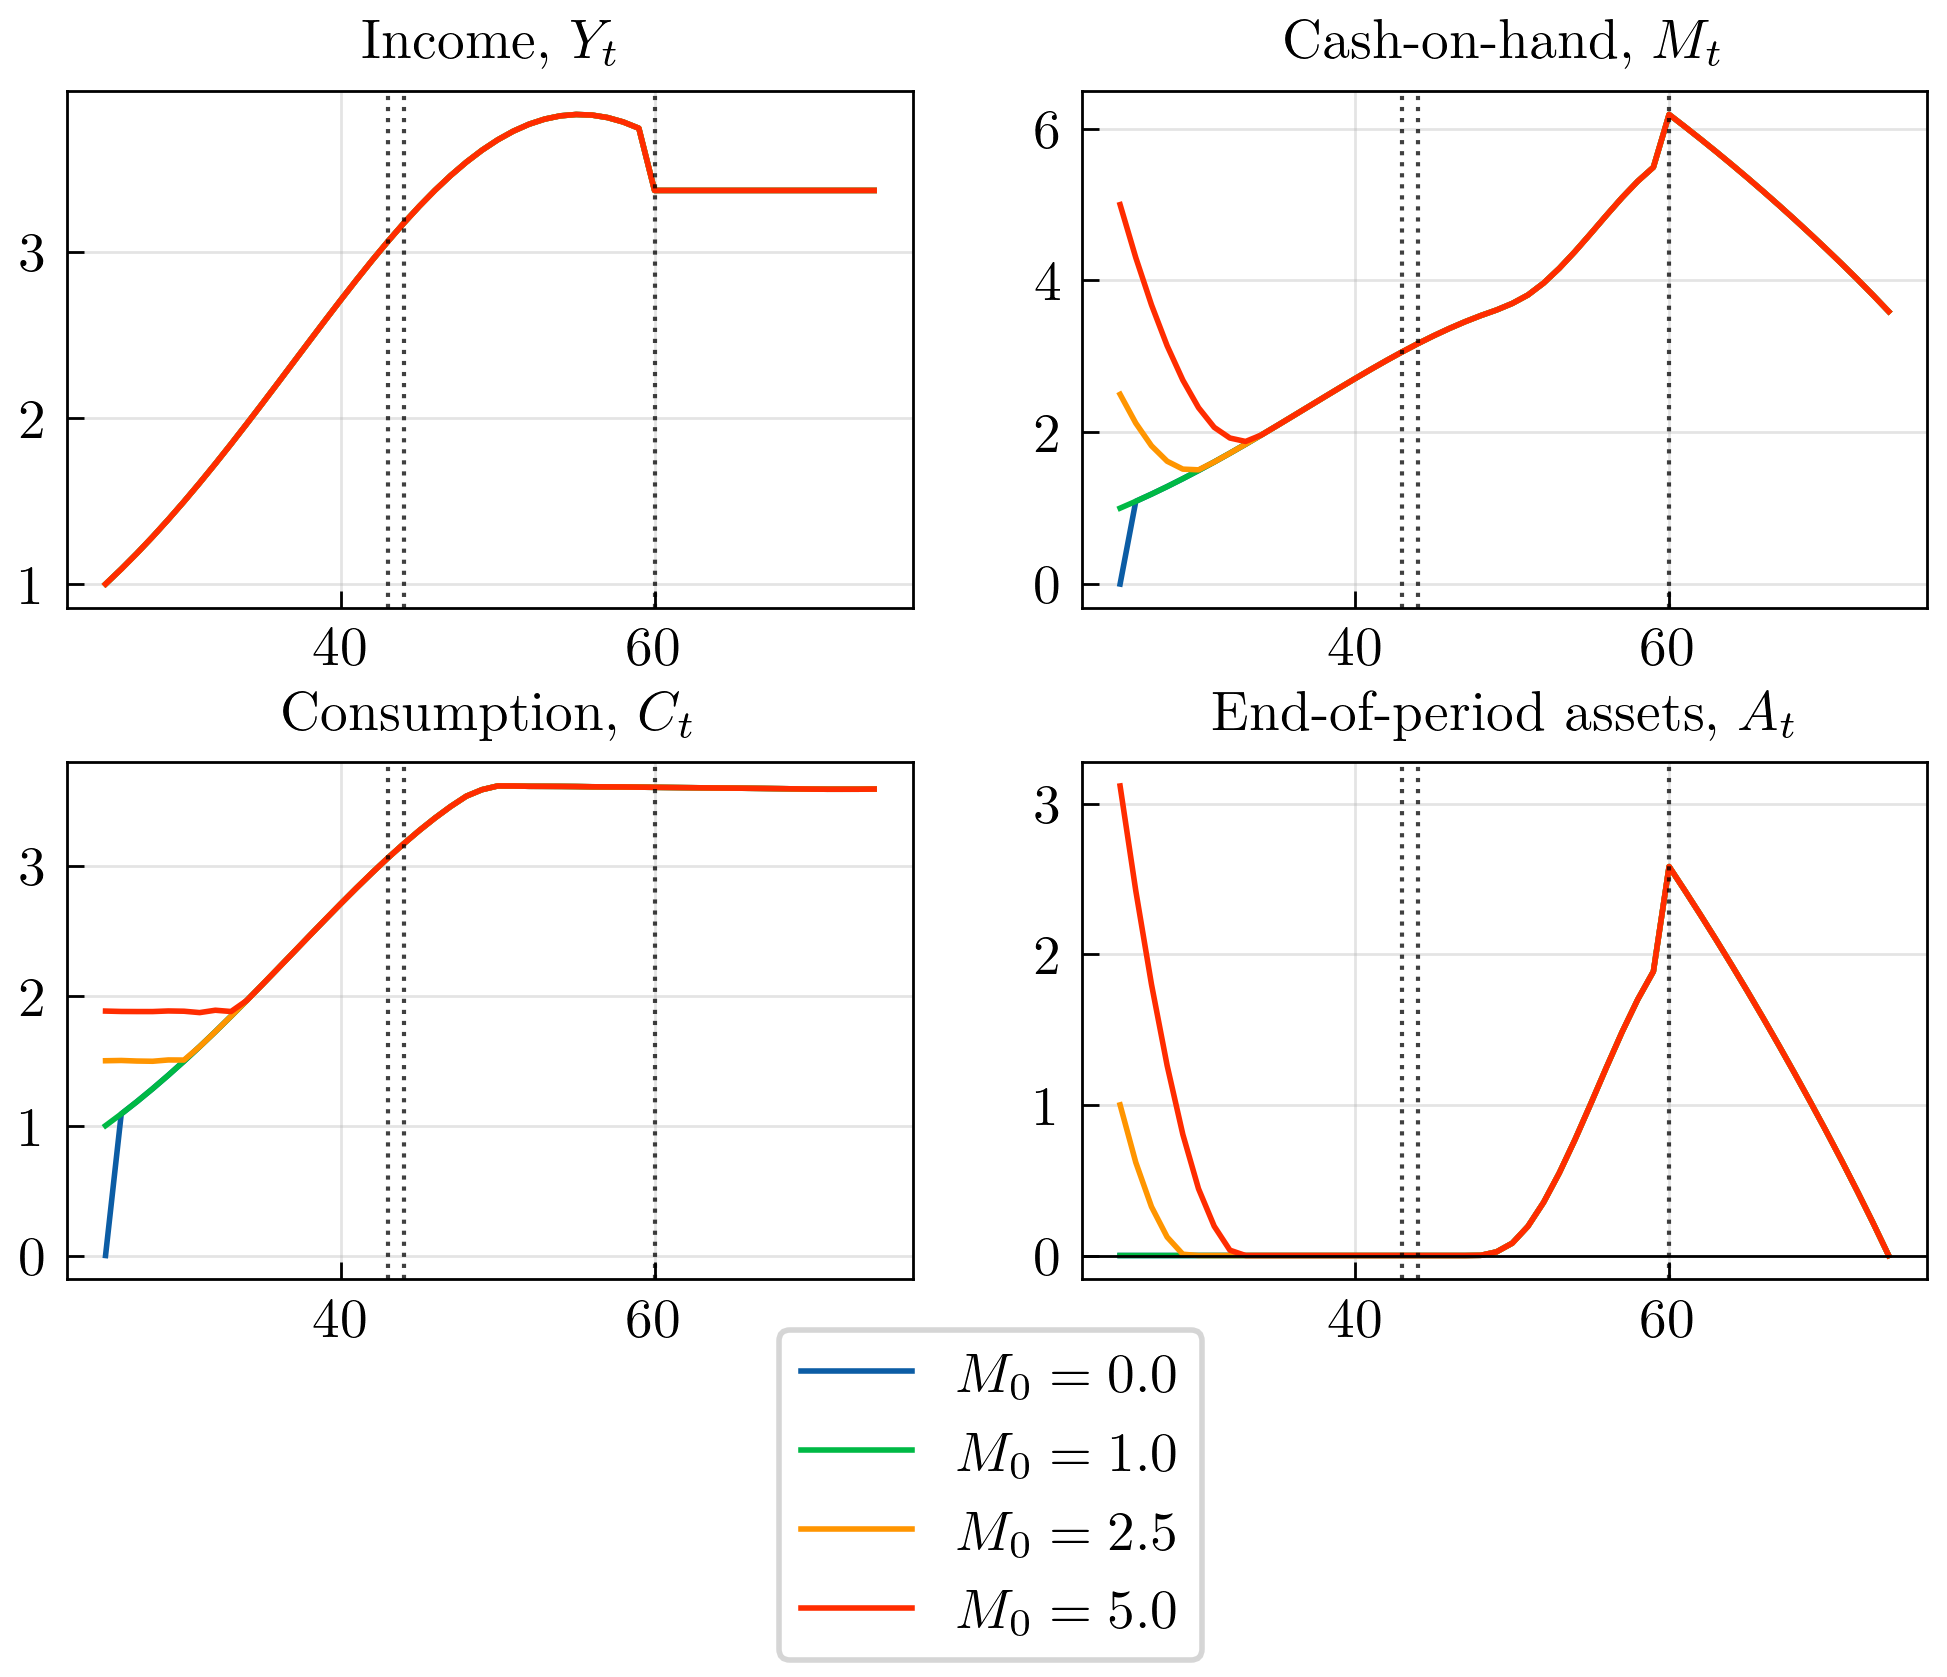

In [4]:
# Parameters
par = par_class()
par.pi = 0.0
par.sigma_d = 0.0
par.sigma_xi = 0.0
par.sigma_psi = 0.0
par.Nd = 1
par.Npsi = 1
par.Nxi = 1
par.simN = 1
minis = [0.0, 1.0, 2.5, 5.0]
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
sims = [np.nan]*4
for i,mini in enumerate(minis):
    par.sim_mini = mini
    _, sim = run_model(par)
    sims[i] = sim

# Plot
fig,ax = plt.subplots(2,2,figsize=(6,4.5),dpi=dpi)
for i,sim in enumerate(sims):
    ax[0,0].plot(range(25,par.T+25), sim.Y.mean(axis=0), label=f'$M_0={minis[i]}$')
    ax[0,1].plot(range(25,par.T+25), sim.M.mean(axis=0), label=f'$M_0={minis[i]}$')
    ax[1,0].plot(range(25,par.T+25), sim.C.mean(axis=0), label=f'$M_0={minis[i]}$')
    ax[1,1].plot(range(25,par.T+25), sim.A.mean(axis=0), label=f'$M_0={minis[i]}$')
ax[0,0].set_title('Income, $Y_t$', fontsize=10)
ax[0,1].set_title('Cash-on-hand, $M_t$', fontsize=10)
ax[1,0].set_title('Consumption, $C_t$', fontsize=10)
ax[1,1].set_title('End-of-period assets, $A_t$', fontsize=10)
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.3)
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.4,0.01), frameon=True)
fig.subplots_adjust(bottom=0.22)
if save: plt.savefig(r'figs\fig_vary_m0_no_uncertainty.pdf')

### Figure: With uncertainty

Fraction of early payments: 0.458


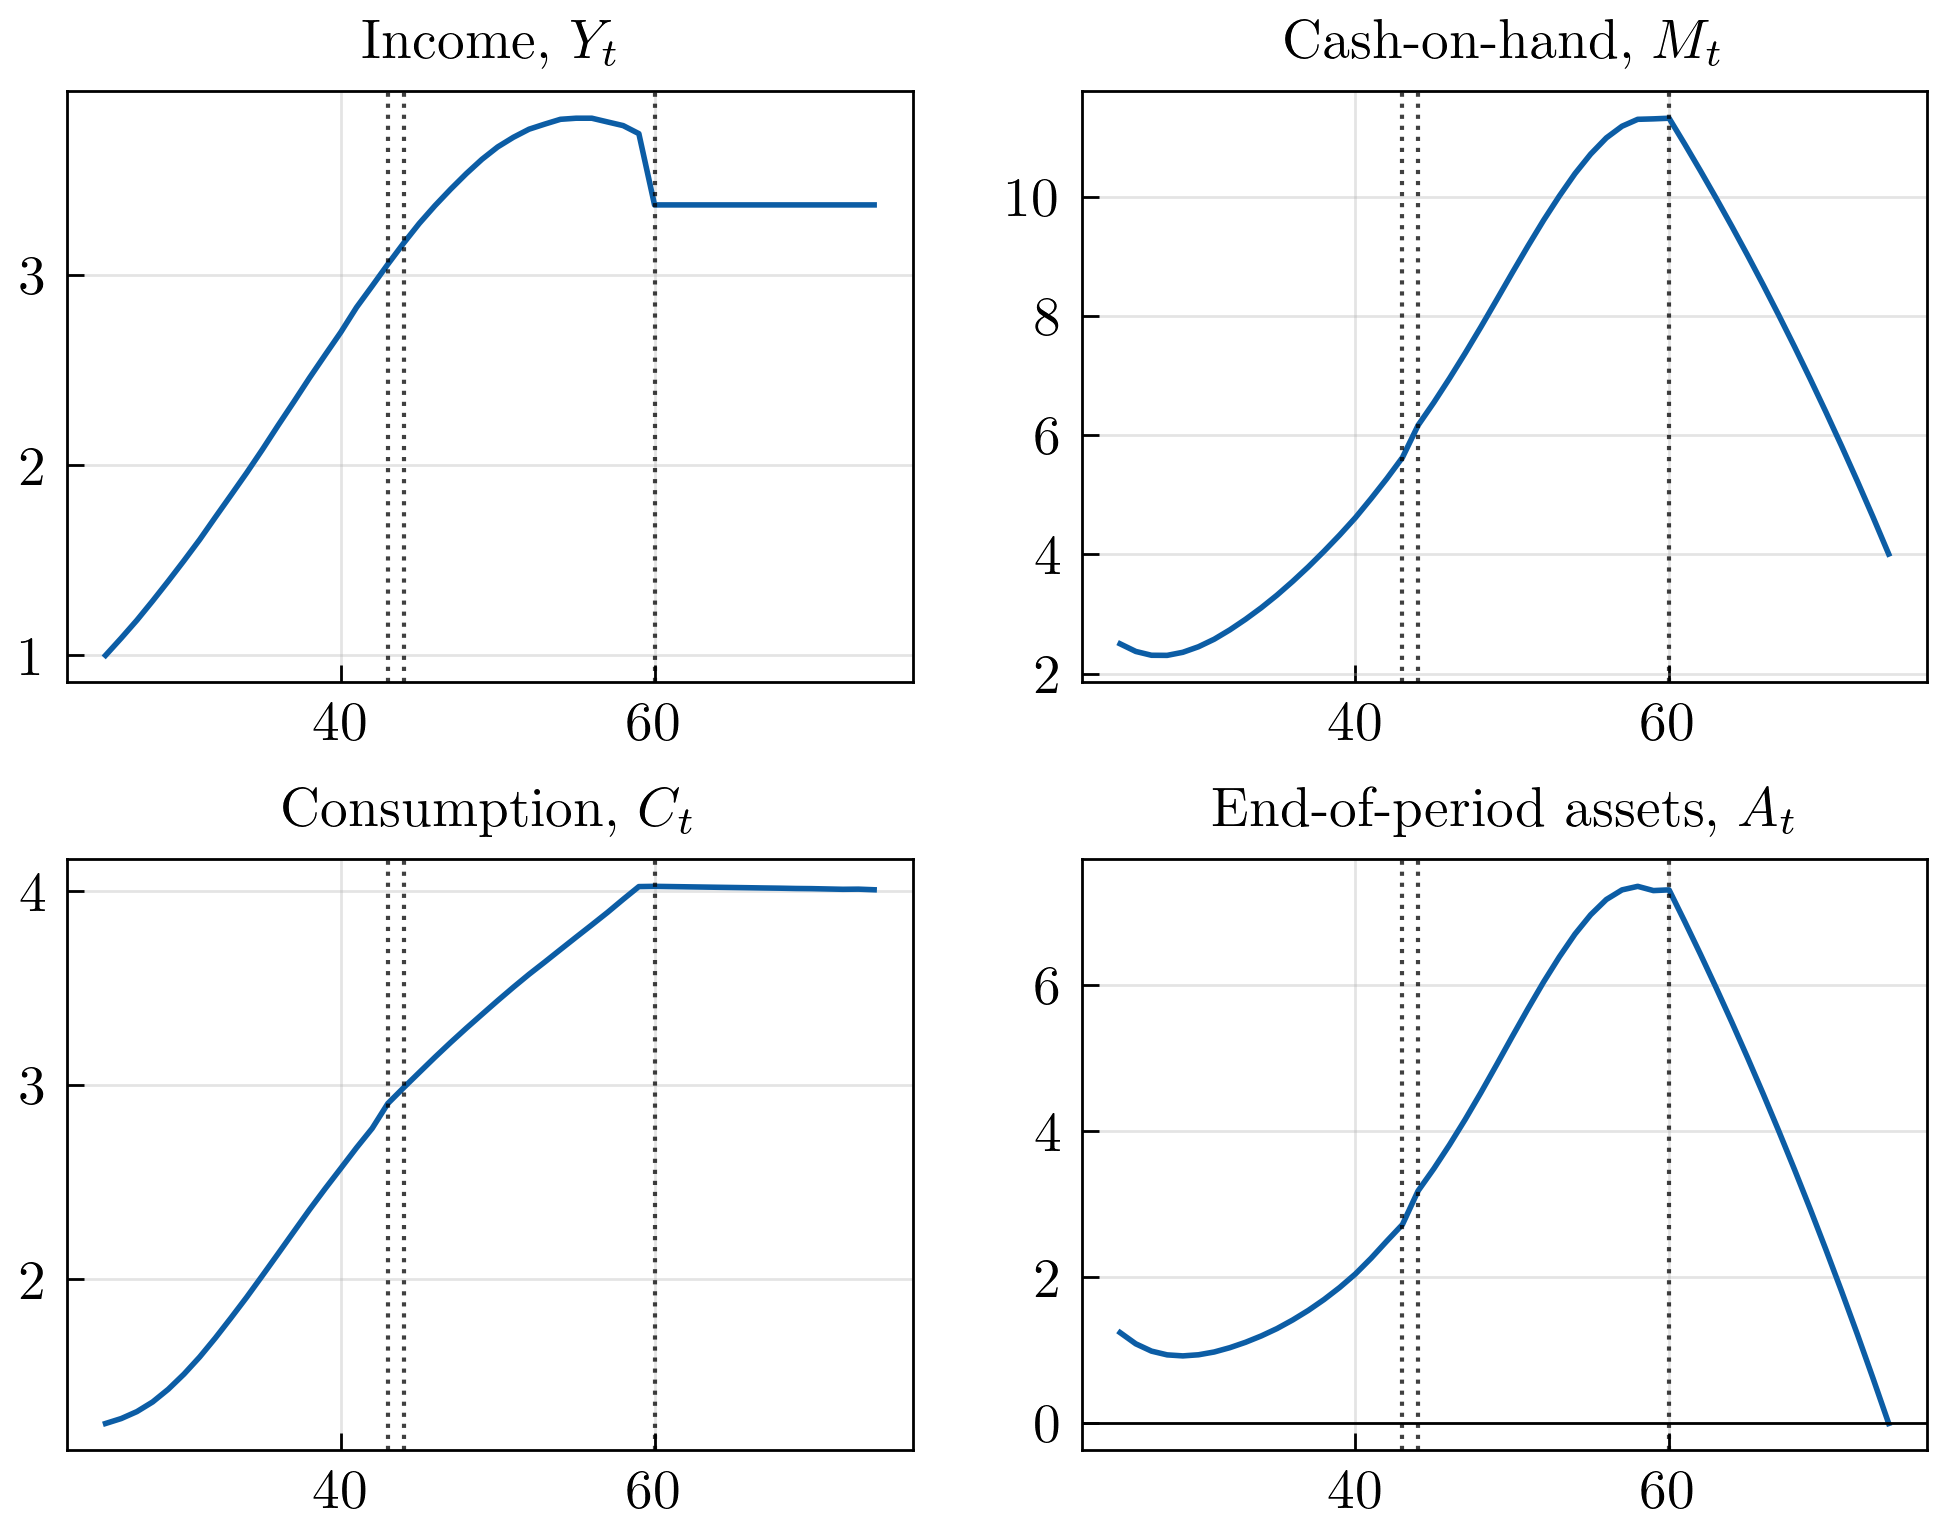

In [5]:
# Parameters
par = par_class()

if fast:
    par.Nm = 50
    par.Nh = 10

# Model
sol, sim = run_model(par)

# Plot
fig,ax = plt.subplots(2,2,figsize=(6,4.5),dpi=dpi)
ax[0,0].plot(range(25,par.T+25), sim.Y.mean(axis=0))
ax[0,1].plot(range(25,par.T+25), sim.M.mean(axis=0))
ax[1,0].plot(range(25,par.T+25), sim.C.mean(axis=0))
ax[1,1].plot(range(25,par.T+25), sim.A.mean(axis=0))
ax[0,0].set_title('Income, $Y_t$', fontsize=10)
ax[0,1].set_title('Cash-on-hand, $M_t$', fontsize=10)
ax[1,0].set_title('Consumption, $C_t$', fontsize=10)
ax[1,1].set_title('End-of-period assets, $A_t$', fontsize=10)
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.3)
print(f'Fraction of early payments: {sim.z.mean():.3f}')
if save: plt.savefig(r'figs\fig_with_uncertainty.pdf')

### Figure: Model simulation for different values of $M_0$ with uncertainty

Fraction of early payments: 0.462
Fraction of early payments: 0.462
Fraction of early payments: 0.458
Fraction of early payments: 0.436


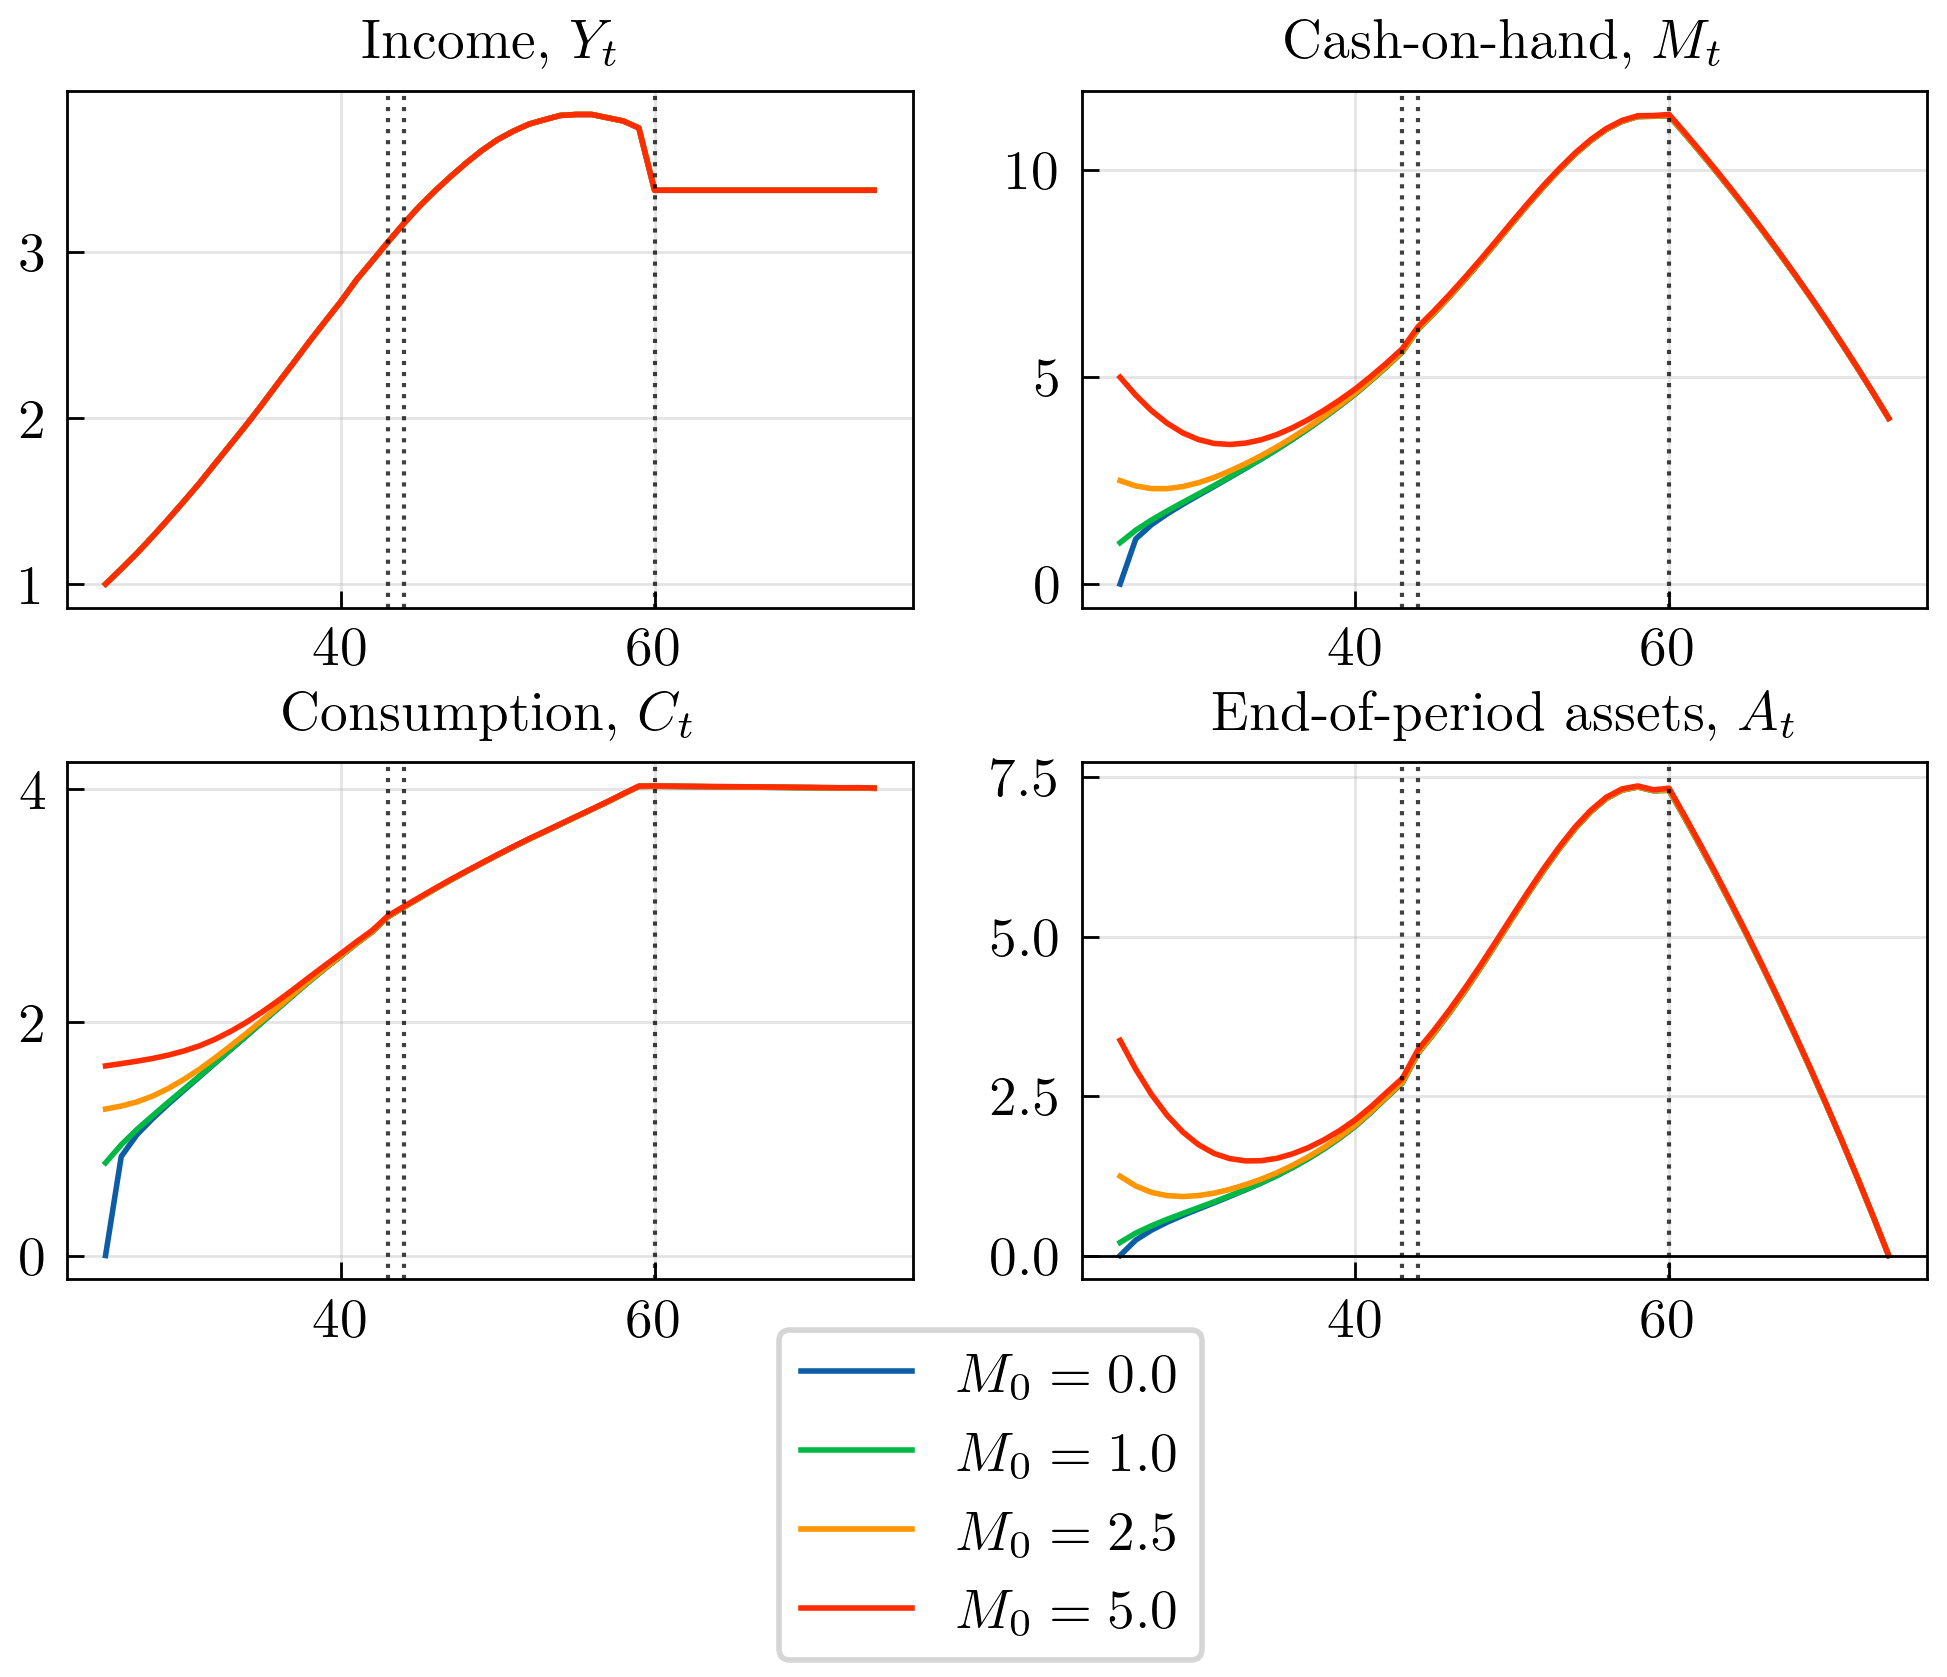

In [6]:
# Parameters
par = par_class()
par.sim_mini = 0.75
minis = [0.0, 1.0, 2.5, 5.0]
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
sims = [np.nan]*4
for i,mini in enumerate(minis):
    par.sim_mini = mini
    _, sim = run_model(par)
    sims[i] = sim
    print(f'Fraction of early payments: {sim.z.mean():.3f}')

# Plot
fig,ax = plt.subplots(2,2,figsize=(6,4.5),dpi=dpi)
for i,sim in enumerate(sims):
    ax[0,0].plot(range(25,par.T+25), sim.Y.mean(axis=0), label=f'$M_0={minis[i]}$')
    ax[0,1].plot(range(25,par.T+25), sim.M.mean(axis=0), label=f'$M_0={minis[i]}$')
    ax[1,0].plot(range(25,par.T+25), sim.C.mean(axis=0), label=f'$M_0={minis[i]}$')
    ax[1,1].plot(range(25,par.T+25), sim.A.mean(axis=0), label=f'$M_0={minis[i]}$')
ax[0,0].set_title('Income, $Y_t$', fontsize=10)
ax[0,1].set_title('Cash-on-hand, $M_t$', fontsize=10)
ax[1,0].set_title('Consumption, $C_t$', fontsize=10)
ax[1,1].set_title('End-of-period assets, $A_t$', fontsize=10)
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.3)
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.4,0.01), frameon=True)
fig.subplots_adjust(bottom=0.22)
if save: plt.savefig(r'figs\fig_vary_m0_with_uncertainty.pdf')

### Figure: Choice of $z^\star$ as a function of $m_{T_H-1}$ with uncertainty

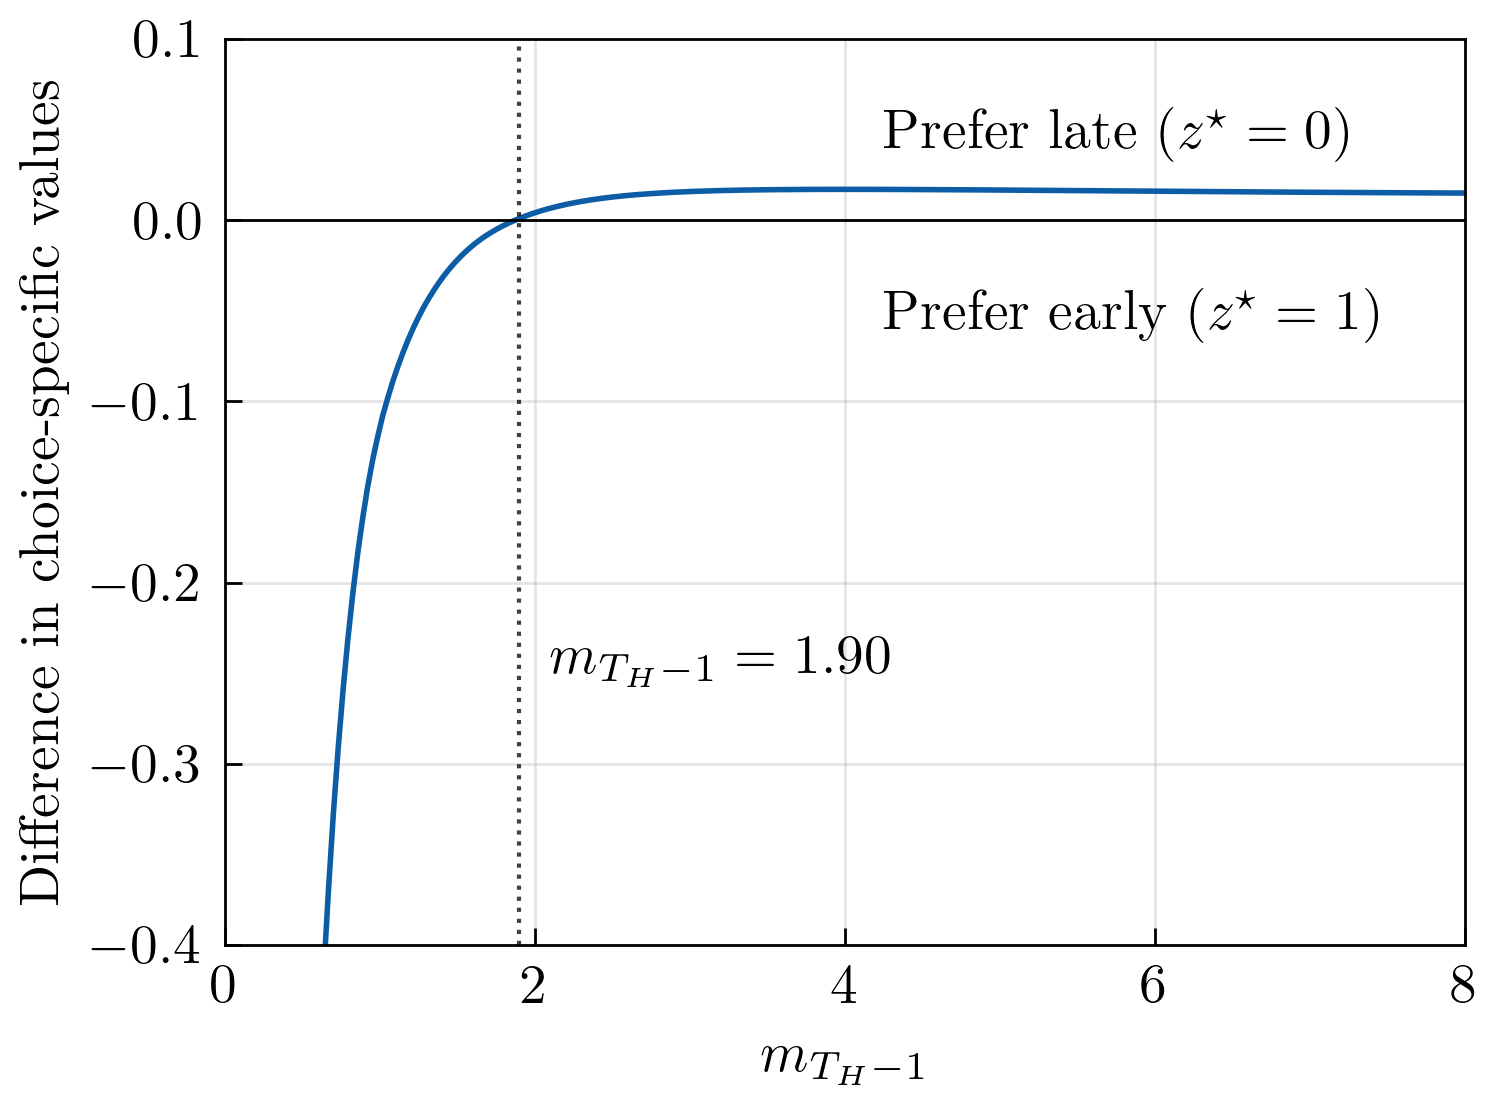

In [7]:
# Interpolate value function at T_H-1 to value when h_t = alpha
t = par.TH-1
min_i_m = 15
max_i_m = par.Nm
grid_h = tools.nonlinspace(0,par.h_max,par.Nh,par.h_phi)
inv_v0 = np.nan + np.zeros(par.Nm)
inv_v1 = np.nan + np.zeros(par.Nm)
for i_m in range(par.Nm):
    inv_v0[i_m] = tools.interp_linear_1d_scalar(grid_h, sol.inv_v[t,i_m,0,:], par.alpha)
    inv_v1[i_m] = tools.interp_linear_1d_scalar(grid_h, sol.inv_v[t,i_m,1,:], par.alpha)
    
# Calculate point at which switch occurs
pref_early = inv_v0 > inv_v1
grid_m = tools.nonlinspace(1e-6,par.m_max,par.Nm,par.m_phi)
switch_m = (grid_m[np.argmin(pref_early)]+grid_m[np.argmin(pref_early-1)])/2

# Draw figure
grid_m = tools.nonlinspace(1e-6,par.m_max,par.Nm,par.m_phi)
plt.figure(figsize=(4,3),dpi=dpi)
plt.grid(alpha=1/3) # Make grid
plt.minorticks_off() # Remove minor ticks
plt.tick_params(top=False, right=False) # Remove major ticks on top and right 
plt.plot(grid_m[min_i_m:max_i_m], 1/inv_v0[min_i_m:max_i_m]-1/inv_v1[min_i_m:max_i_m])
plt.axvline(switch_m,color='black', alpha=3/4, ls=':', lw=3/4)
plt.xlim([0.0,8])
plt.ylim([-0.4,0.1])
plt.xlabel('$m_{{T_H-1}}$')
plt.ylabel('Difference in choice-specific values')
plt.annotate('Prefer late ($z^\star=0$)', (4.25,0.04))
plt.annotate('Prefer early ($z^\star=1$)', (4.25,-0.06))
plt.arrow(9.2,0.03,0,0.04,head_width=0.1,head_length=0.01,color='black')
plt.arrow(9.2,-0.03,0,-0.04,head_width=0.1,head_length=0.01,color='black')
plt.annotate(f'$m_{{T_H-1}}={switch_m:.2f}$', (2.1,-0.25))
plt.axhline(0,color='black',lw=0.5)
if save: plt.savefig(r'figs\fig_choice.pdf')

### Figure: MPC as a function of $m_{T_H-1}$

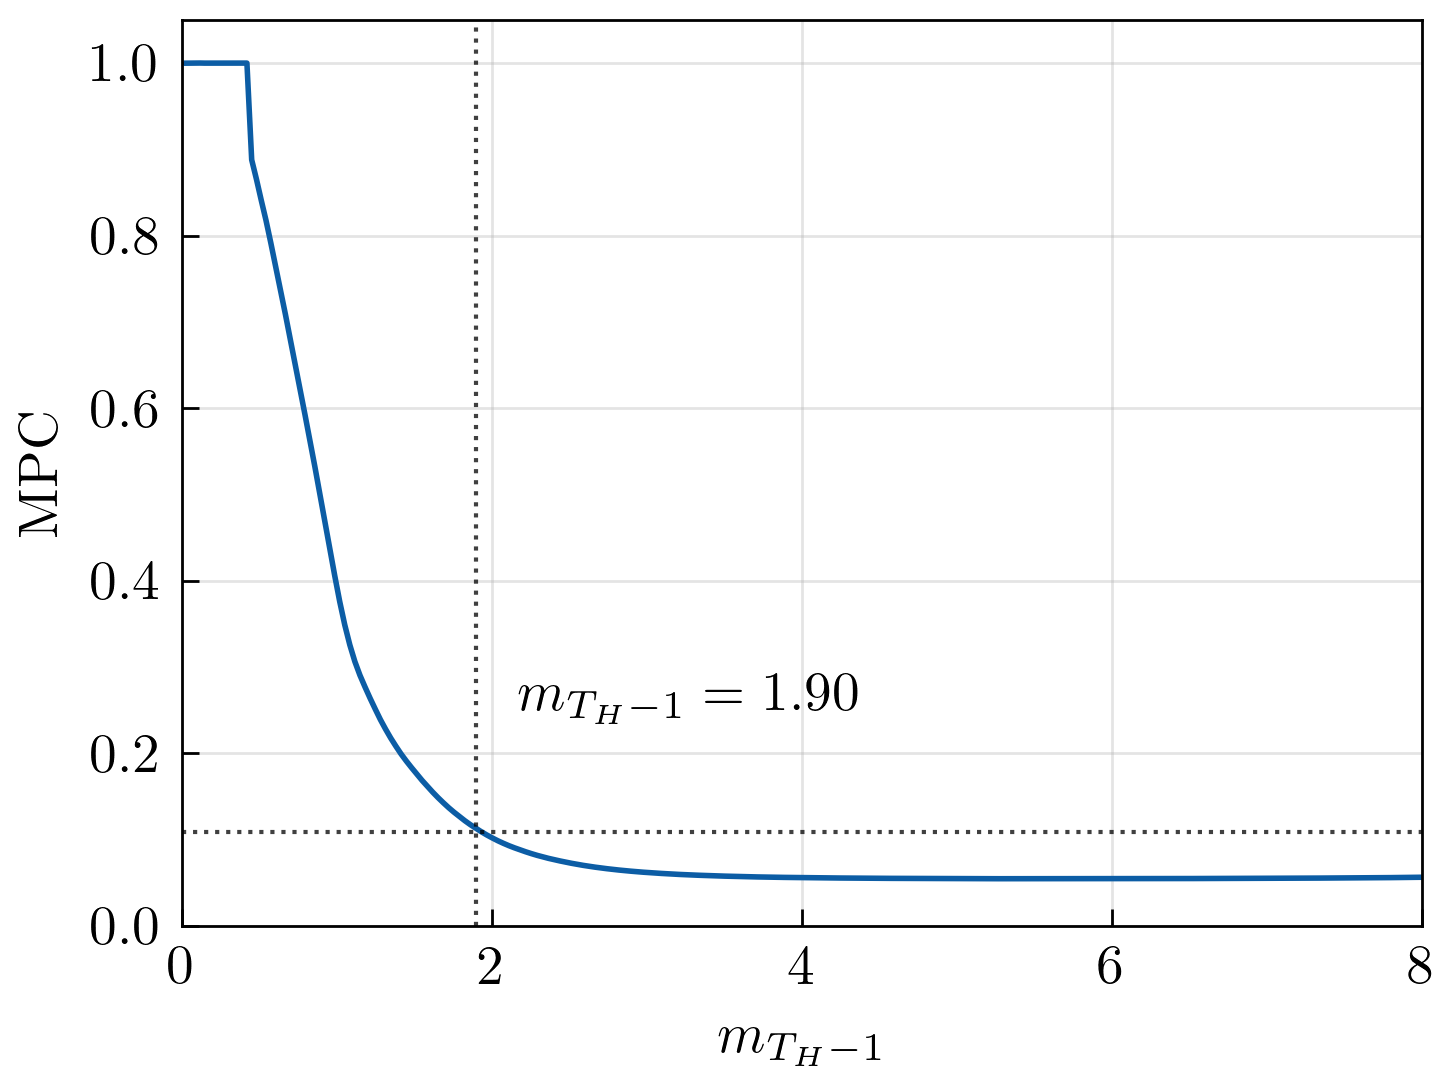

In [8]:
# Interpolate value function at T_H-1 to value when h_t = alpha
t = par.TH-1

c = np.nan + np.zeros(par.Nm)
for i_m in range(par.Nm):
    c[i_m] = tools.interp_linear_1d_scalar(grid_h, sol.c[t,i_m,1,:], par.alpha)
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
    
# Draw figure
plt.figure(figsize=(4,3),dpi=dpi)
plt.grid(alpha=1/3) # Make grid
plt.minorticks_off() # Remove minor ticks
plt.tick_params(top=False, right=False) # Remove major ticks on top and right 
mpc = np.diff(c)/np.diff(grid_m)
mpc[14:180] = smooth(mpc,25)[14:180]
mpc[30:180] = smooth(mpc,5)[30:180]
mpc[180:]   = smooth(mpc,2)[180:]
plt.plot(grid_m[1:], mpc)
plt.xlabel('$m_{T_H-1}$')
plt.ylabel('MPC')
switch_m = 1.9
mpc_at_switch_m = tools.interp_linear_1d_scalar(grid_m, mpc, 1.9)
plt.xlim([0,8])
plt.ylim([0,1.05])
plt.axvline(switch_m, color='black', alpha=3/4, ls=':', lw=3/4)
plt.axhline(mpc_at_switch_m, color='black', alpha=3/4, ls=':', lw=3/4)
plt.annotate(f'$m_{{T_H-1}}={switch_m:.2f}$', (2.17,0.25))
if save: plt.savefig(r'figs\fig_mpc.pdf')

### Figure: Age profile

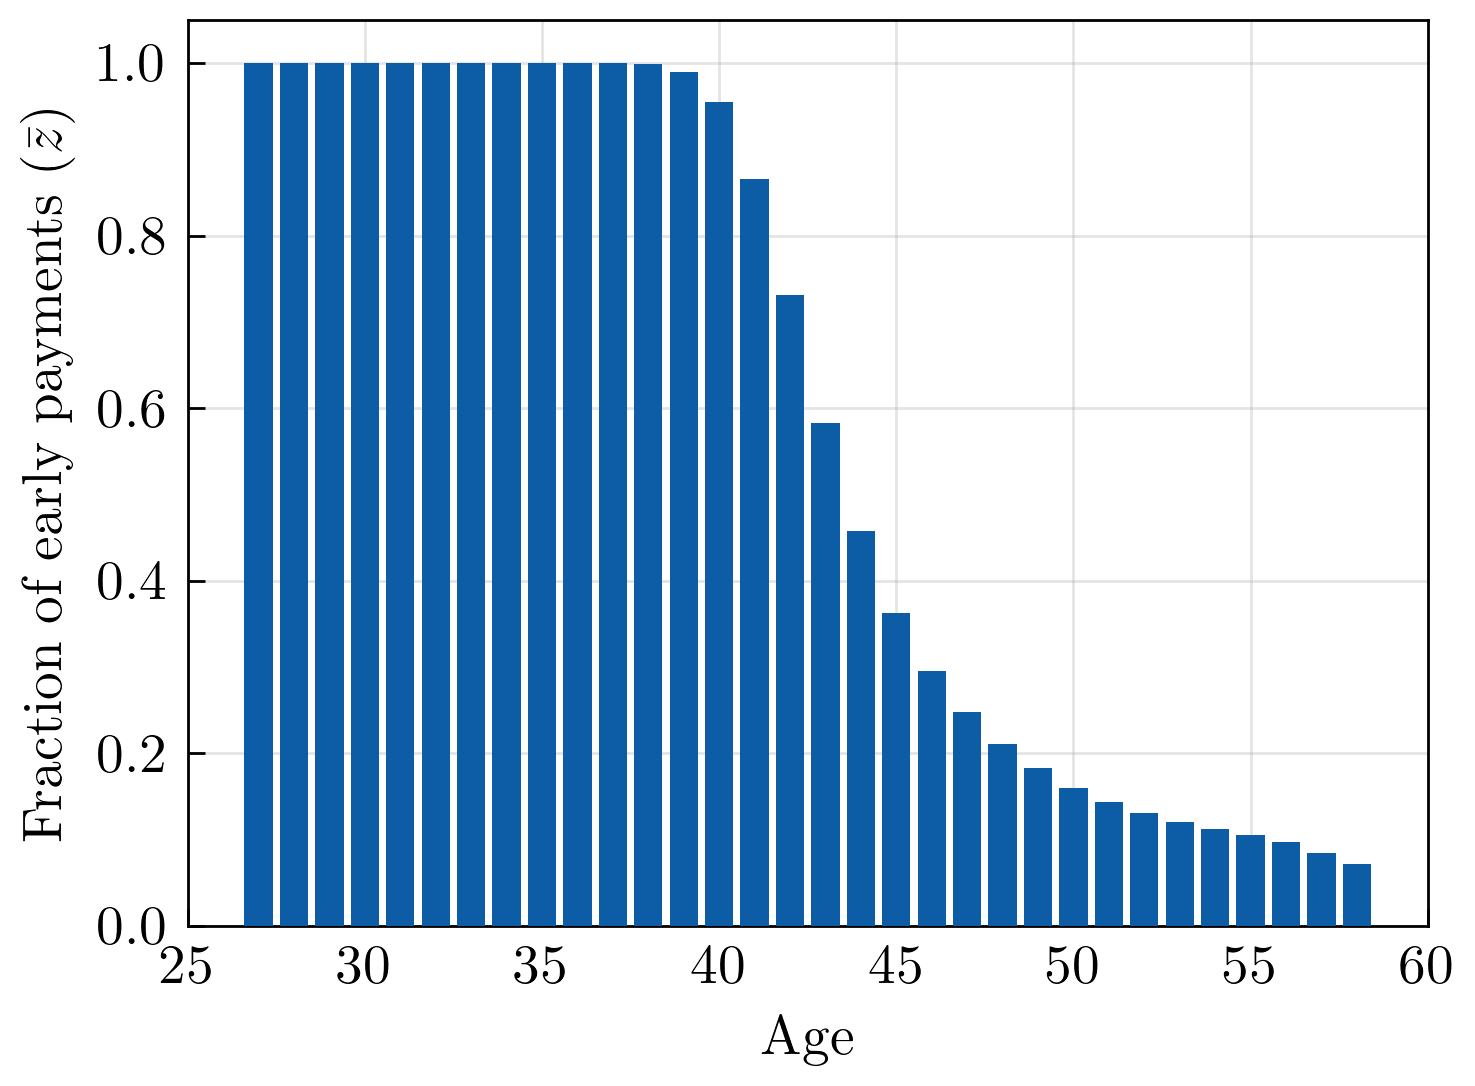

In [9]:
# Parameters
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
    
# Run models
zs = []
THs = np.linspace(2,33,32,dtype=int)
for TH in THs:
    par.TH = TH
    _, sim = run_model(par)
    z_mean = sim.z.mean()
    zs.append(z_mean)
    
# Graph
plt.figure(figsize=(4,3),dpi=dpi)
plt.bar(THs + 25,zs,zorder=3)
plt.grid(alpha=1/3,zorder=0)
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlim([25,60])
plt.xlabel('Age')
plt.ylabel(r'Fraction of early payments ($\bar{z}$)')
if save: plt.savefig(r'figs\fig_age_profile.pdf')

### Calculation: MPC

In [10]:
# Parameters
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
    
# Calculate consumption and holiday pay for people consuming early
_, sim = run_model(par)
N_early = sum(sim.z)
sim_C_early = np.nan + np.zeros((N_early,par.T))
sim_H_early  = np.nan + np.zeros((N_early,par.T))
i_early = 0
i_earlies = []
for i,z_i in enumerate(sim.z):
    if z_i == 1:
        i_earlies.append(i)
        sim_C_early[i_early,:] = sim.C[i,:]
        sim_H_early[i_early,:] = sim.H[i,:]
        i_early = i_early + 1
sim_C_total_w = sim_C_early[:,par.TH-1].sum(axis=0) + sim_C_early[:,par.TH].sum(axis=0)
H_total = sim_H_early[:,par.TH-1].sum(axis=0)

# Colculate consumption and holiday pay for people who would have consumed early
par.z_mode = 0
_, sim = run_model(par)
sim_C_total_wo = 0.0
for i in i_earlies:
    sim_C_total_wo += sim.C[i,par.TH-1] + sim.C[i,par.TH]
mpc_selection = (sim_C_total_w - sim_C_total_wo)/H_total

# Colculate 
sim_C_total_both_wo = sim.C[:,par.TH-1].sum(axis=0) + sim.C[:,par.TH].sum(axis=0)

# Colculate consumption forcing early payments
par.z_mode = 1
_, sim = run_model(par)
sim_C_total_both_w = sim.C[:,par.TH-1].sum(axis=0) + sim.C[:,par.TH].sum(axis=0)
H_total_both = sim.H[:,par.TH-1].sum(axis=0)
mpc_forced = (sim_C_total_both_w - sim_C_total_both_wo)/H_total_both

print(f'MPC with self-selection:  {mpc_selection:.3f}')
print(f'MPC with forced payments: {mpc_forced:.3f}')

MPC with self-selection:  0.286
MPC with forced payments: 0.195


### Figure: Exogenous holiday pay timing

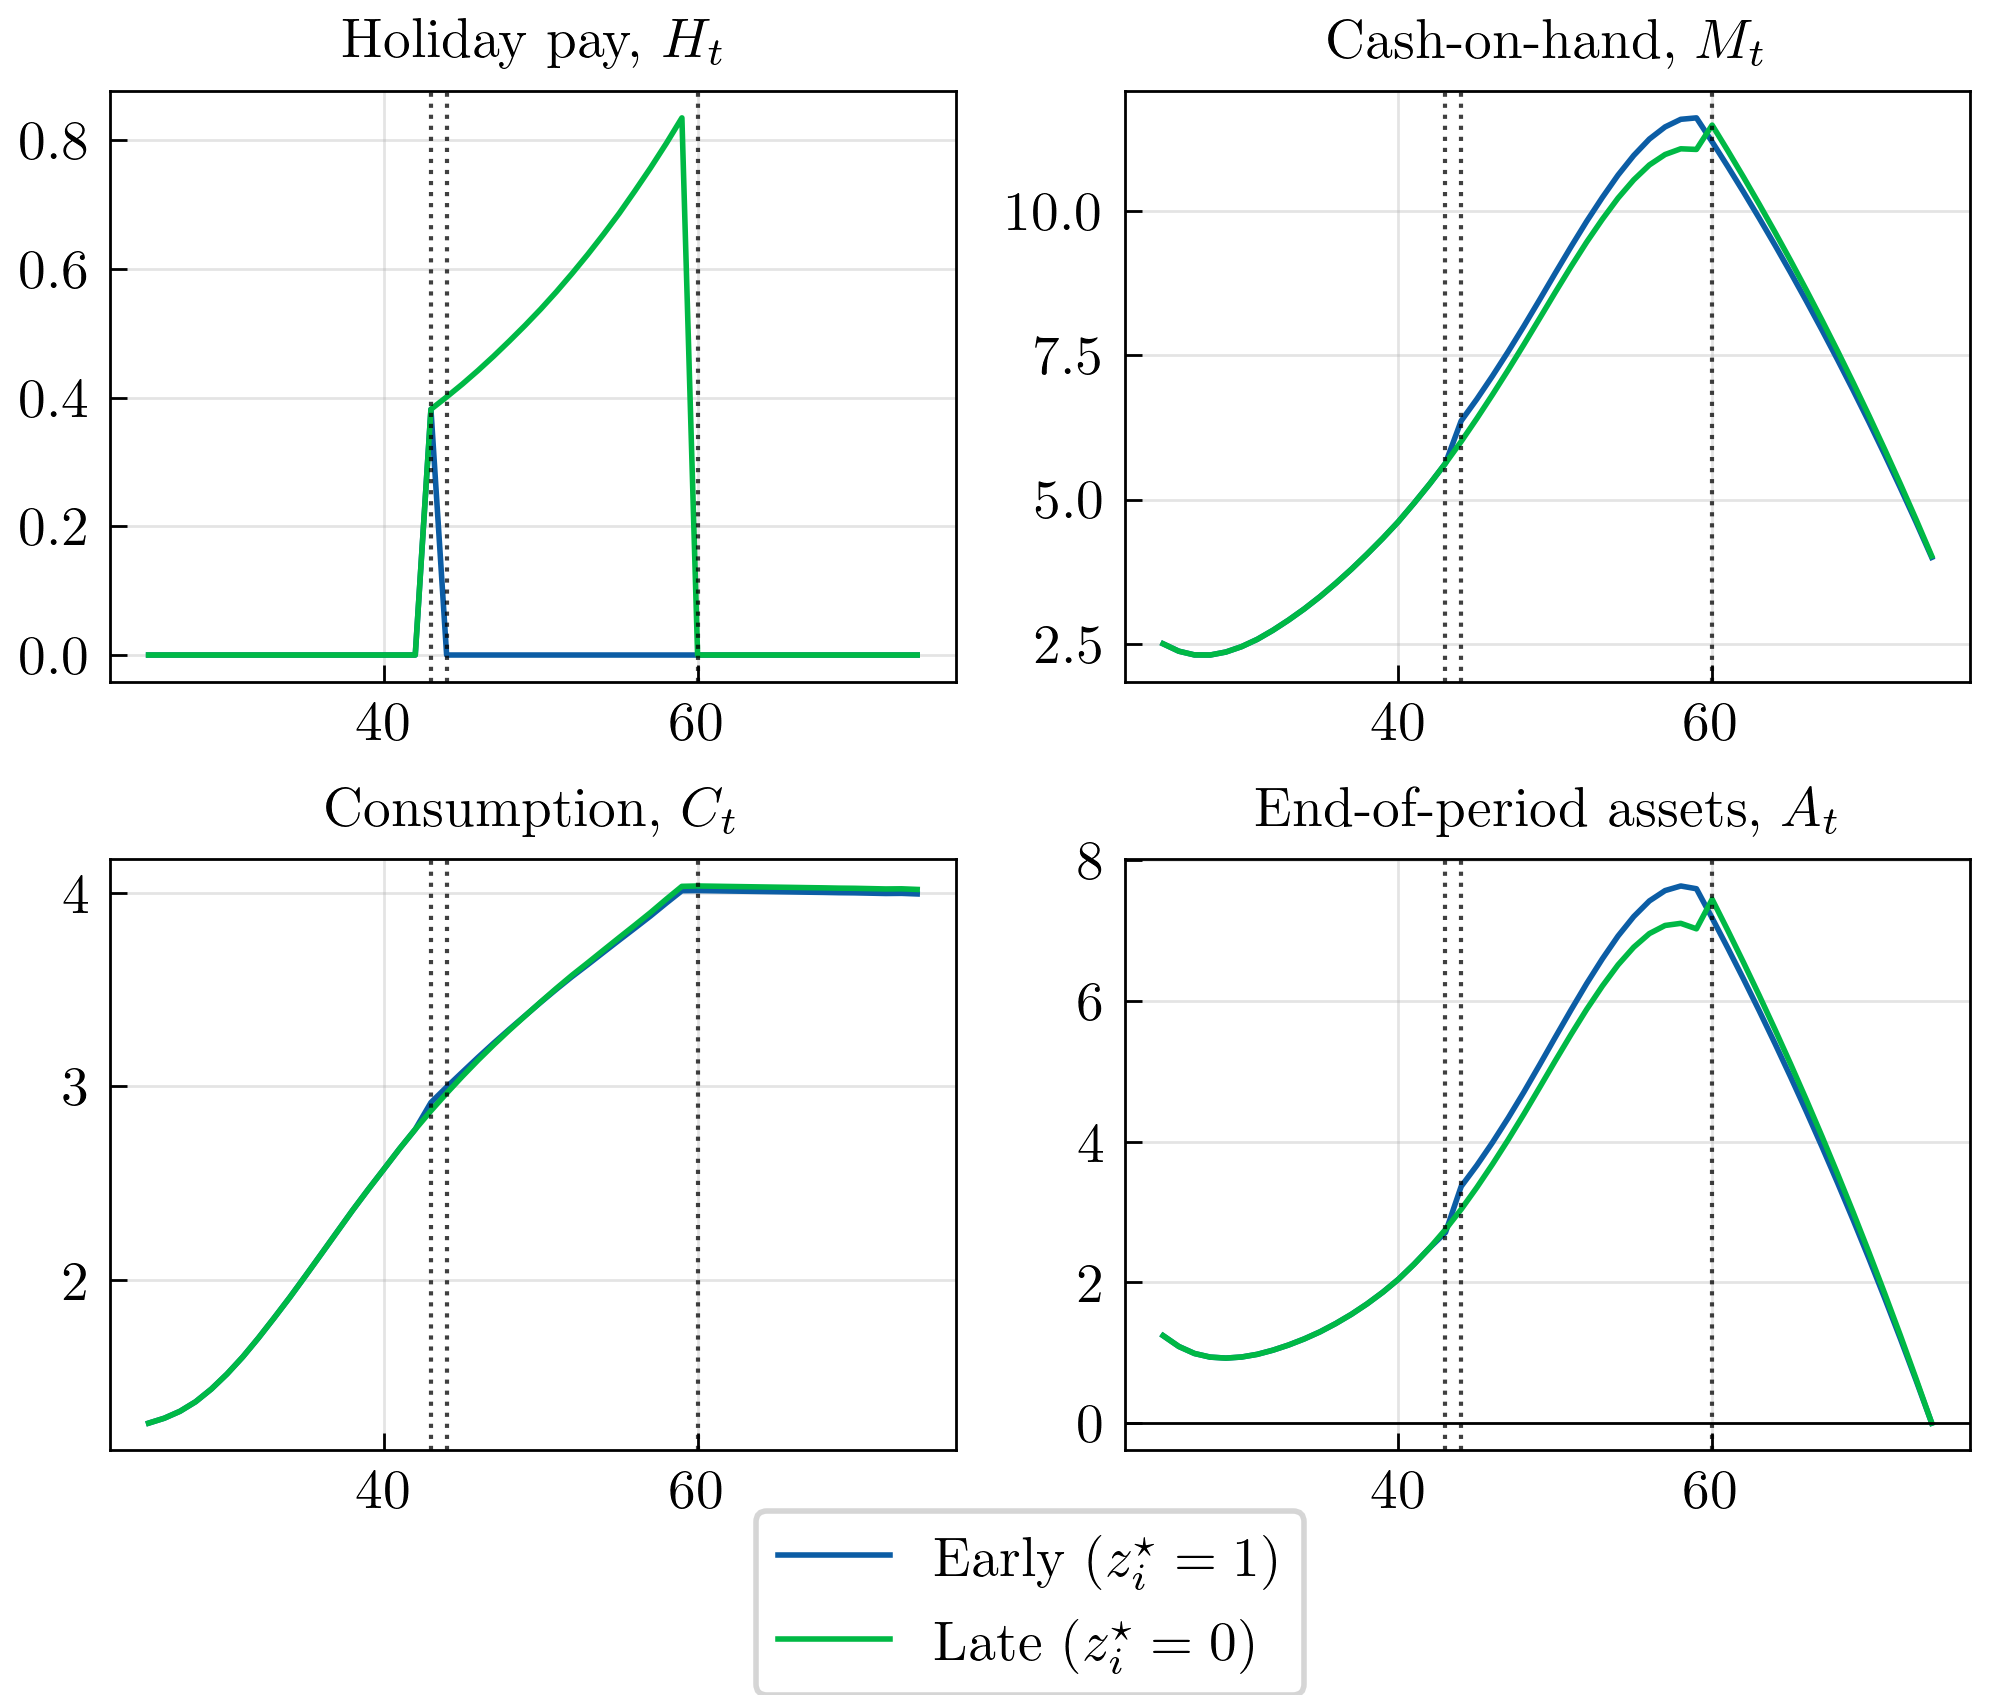

In [11]:
# Parameters
par = par_class()
par.z_mode = 1
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
_, sim_early = run_model(par)
par.z_mode = 0
_, sim_late = run_model(par)

# Plot
fig,ax = plt.subplots(2,2,figsize=(6,4.5),dpi=dpi)
ax[0,0].plot(range(25,par.T+25), sim_early.H.mean(axis=0), label='Early ($z_i^\star=1$)')
ax[0,0].plot(range(25,par.T+25), sim_late.H.mean(axis=0), label='Late ($z_i^\star=0$)')
ax[0,1].plot(range(25,par.T+25), sim_early.M.mean(axis=0), label='Early ($z_i^\star=1$)')
ax[0,1].plot(range(25,par.T+25), sim_late.M.mean(axis=0), label='Late ($z_i^\star=0$)')
ax[1,0].plot(range(25,par.T+25), sim_early.C.mean(axis=0), label='Early ($z_i^\star=1$)')
ax[1,0].plot(range(25,par.T+25), sim_late.C.mean(axis=0), label='Late ($z_i^\star=0$)')
ax[1,1].plot(range(25,par.T+25), sim_early.A.mean(axis=0), label='Early ($z_i^\star=1$)')
ax[1,1].plot(range(25,par.T+25), sim_late.A.mean(axis=0), label='Late ($z_i^\star=0$)')
ax[0,0].set_title('Holiday pay, $H_t$', fontsize=10)
ax[0,1].set_title('Cash-on-hand, $M_t$', fontsize=10)
ax[1,0].set_title('Consumption, $C_t$', fontsize=10)
ax[1,1].set_title('End-of-period assets, $A_t$', fontsize=10)
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.3)
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.38,0.00), frameon=True)
if save: plt.savefig(r'figs\fig_exo_ha.pdf')

### Figure: Endogenous holiday pay timining

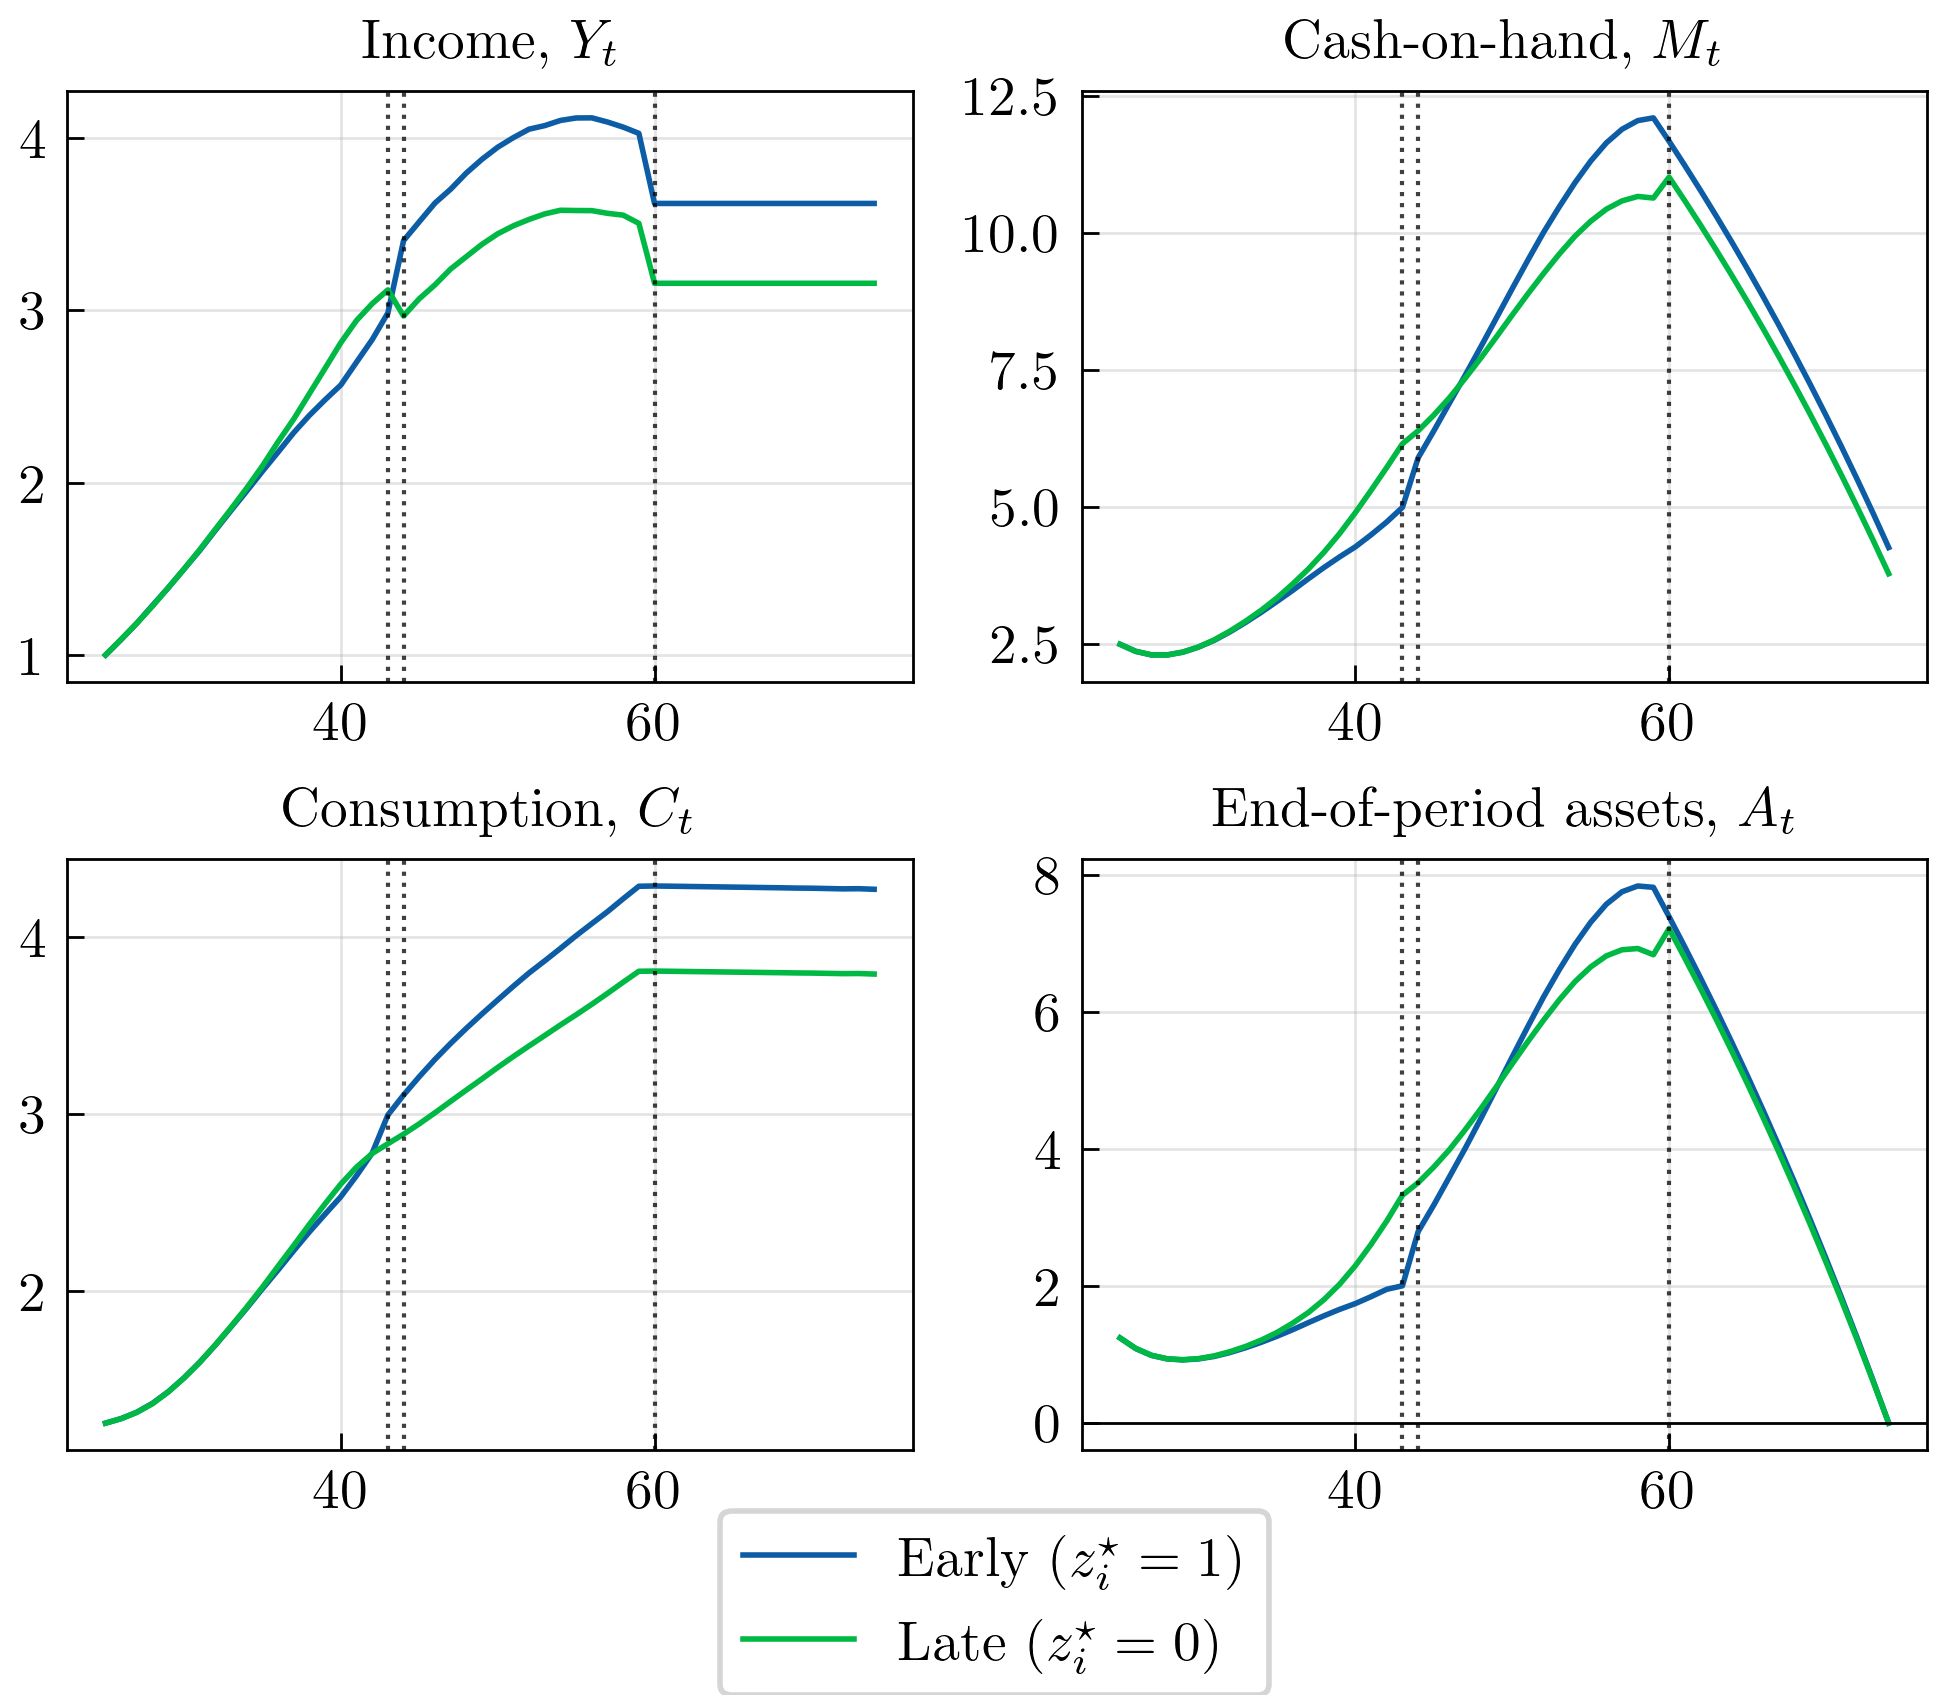

In [12]:
# Parameters
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
_, sim = run_model(par)

# Seperate time series for early and late payments
N_early = sum(sim.z)
N_late  = par.simN - N_early
sim_Y_early = np.nan + np.zeros((N_early,par.T))
sim_Y_late  = np.nan + np.zeros((N_late,par.T))
sim_M_early = np.nan + np.zeros((N_early,par.T))
sim_M_late  = np.nan + np.zeros((N_late,par.T))
sim_C_early = np.nan + np.zeros((N_early,par.T))
sim_C_late  = np.nan + np.zeros((N_late,par.T))
sim_A_early = np.nan + np.zeros((N_early,par.T))
sim_A_late  = np.nan + np.zeros((N_late,par.T))
i_early = 0
i_late  = 0
for i,z_i in enumerate(sim.z):
    if z_i == 1:
        sim_Y_early[i_early,:] = sim.Y[i,:]
        sim_M_early[i_early,:] = sim.M[i,:]
        sim_C_early[i_early,:] = sim.C[i,:]
        sim_A_early[i_early,:] = sim.A[i,:]
        i_early = i_early + 1
    else:
        sim_Y_late[i_late,:] = sim.Y[i,:]
        sim_M_late[i_late,:] = sim.M[i,:]
        sim_C_late[i_late,:] = sim.C[i,:]
        sim_A_late[i_late,:] = sim.A[i,:]
        i_late = i_late + 1

# Plot
fig,ax = plt.subplots(2,2,figsize=(6,4.5),dpi=dpi)
ax[0,0].plot(range(25,par.T+25), sim_Y_early.mean(axis=0), label='Early ($z_i^\star=1$)')
ax[0,0].plot(range(25,par.T+25), sim_Y_late.mean(axis=0), label='Late ($z_i^\star=0$)')
ax[0,1].plot(range(25,par.T+25), sim_M_early.mean(axis=0), label='Early ($z_i^\star=1$)')
ax[0,1].plot(range(25,par.T+25), sim_M_late.mean(axis=0), label='Late ($z_i^\star=0$)')
ax[1,0].plot(range(25,par.T+25), sim_C_early.mean(axis=0), label='Early ($z_i^\star=1$)')
ax[1,0].plot(range(25,par.T+25), sim_C_late.mean(axis=0), label='Late ($z_i^\star=0$)')
ax[1,1].plot(range(25,par.T+25), sim_A_early.mean(axis=0), label='Early ($z_i^\star=1$)')
ax[1,1].plot(range(25,par.T+25), sim_A_late.mean(axis=0), label='Late ($z_i^\star=0$)')
ax[0,0].set_title('Income, $Y_t$', fontsize=10)
ax[0,1].set_title('Cash-on-hand, $M_t$', fontsize=10)
ax[1,0].set_title('Consumption, $C_t$', fontsize=10)
ax[1,1].set_title('End-of-period assets, $A_t$', fontsize=10)
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.3)
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.37,0.00), frameon=True)
if save: plt.savefig(r'figs\fig_endo_ha.pdf')

### Figure: Asset histograms

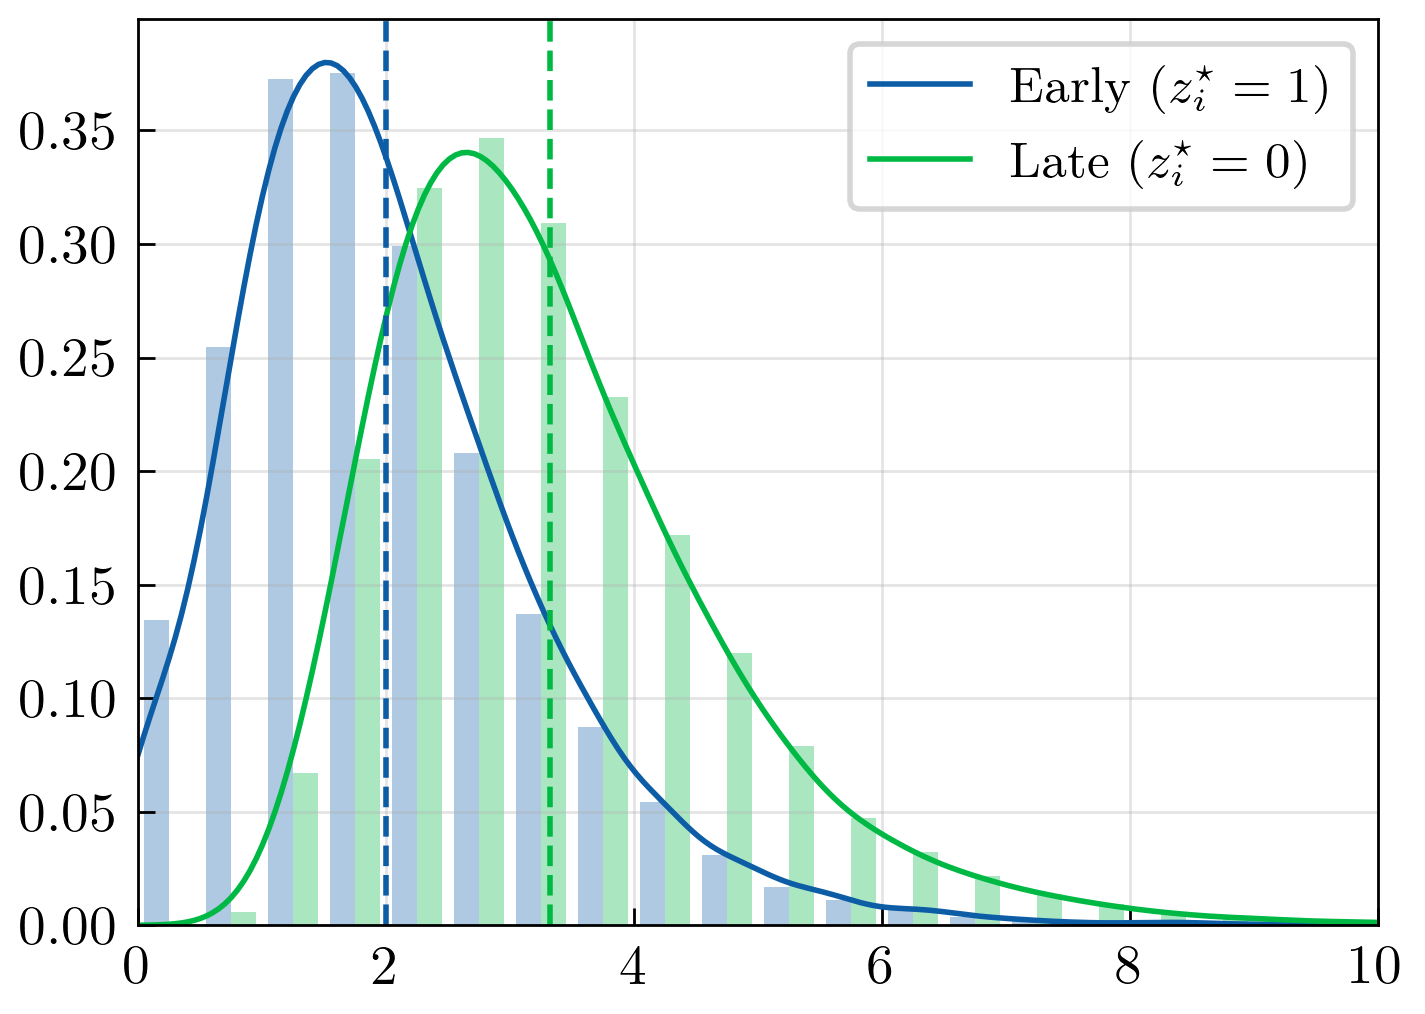

In [13]:
# Compute kernel densities
xs = np.linspace(0,10,200)
density_early = gaussian_kde(sim_A_early[:,par.TH-1], bw_method=0.2)
density_late = gaussian_kde(sim_A_late[:,par.TH-1], bw_method=0.2)

# Do figure
plt.figure(figsize=(4,3),dpi=dpi)
plt.plot(xs,density_early(xs), color='#0C5DA5', label='Early ($z_i^\star=1$)')
plt.plot(xs,density_late(xs), color='#00B945', label='Late ($z_i^\star=0$)')
plt.hist([sim_A_early[:,par.TH-1],sim_A_late[:,par.TH-1]], alpha=1/3, density = True, bins = np.linspace(0,10,21))
plt.axvline(sim_A_early[:,par.TH-1].mean(), color='#0C5DA5', ls='--')
plt.axvline(sim_A_late[:,par.TH-1].mean(), color='#00B945', ls='--')
plt.xlim([0,10])
plt.grid(alpha=1/3)
plt.minorticks_off() 
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.legend(frameon=True, fontsize=9)
if save: plt.savefig(r'figs\fig_asset_hist.pdf')

### Figure: Comparison of VFI and EGM

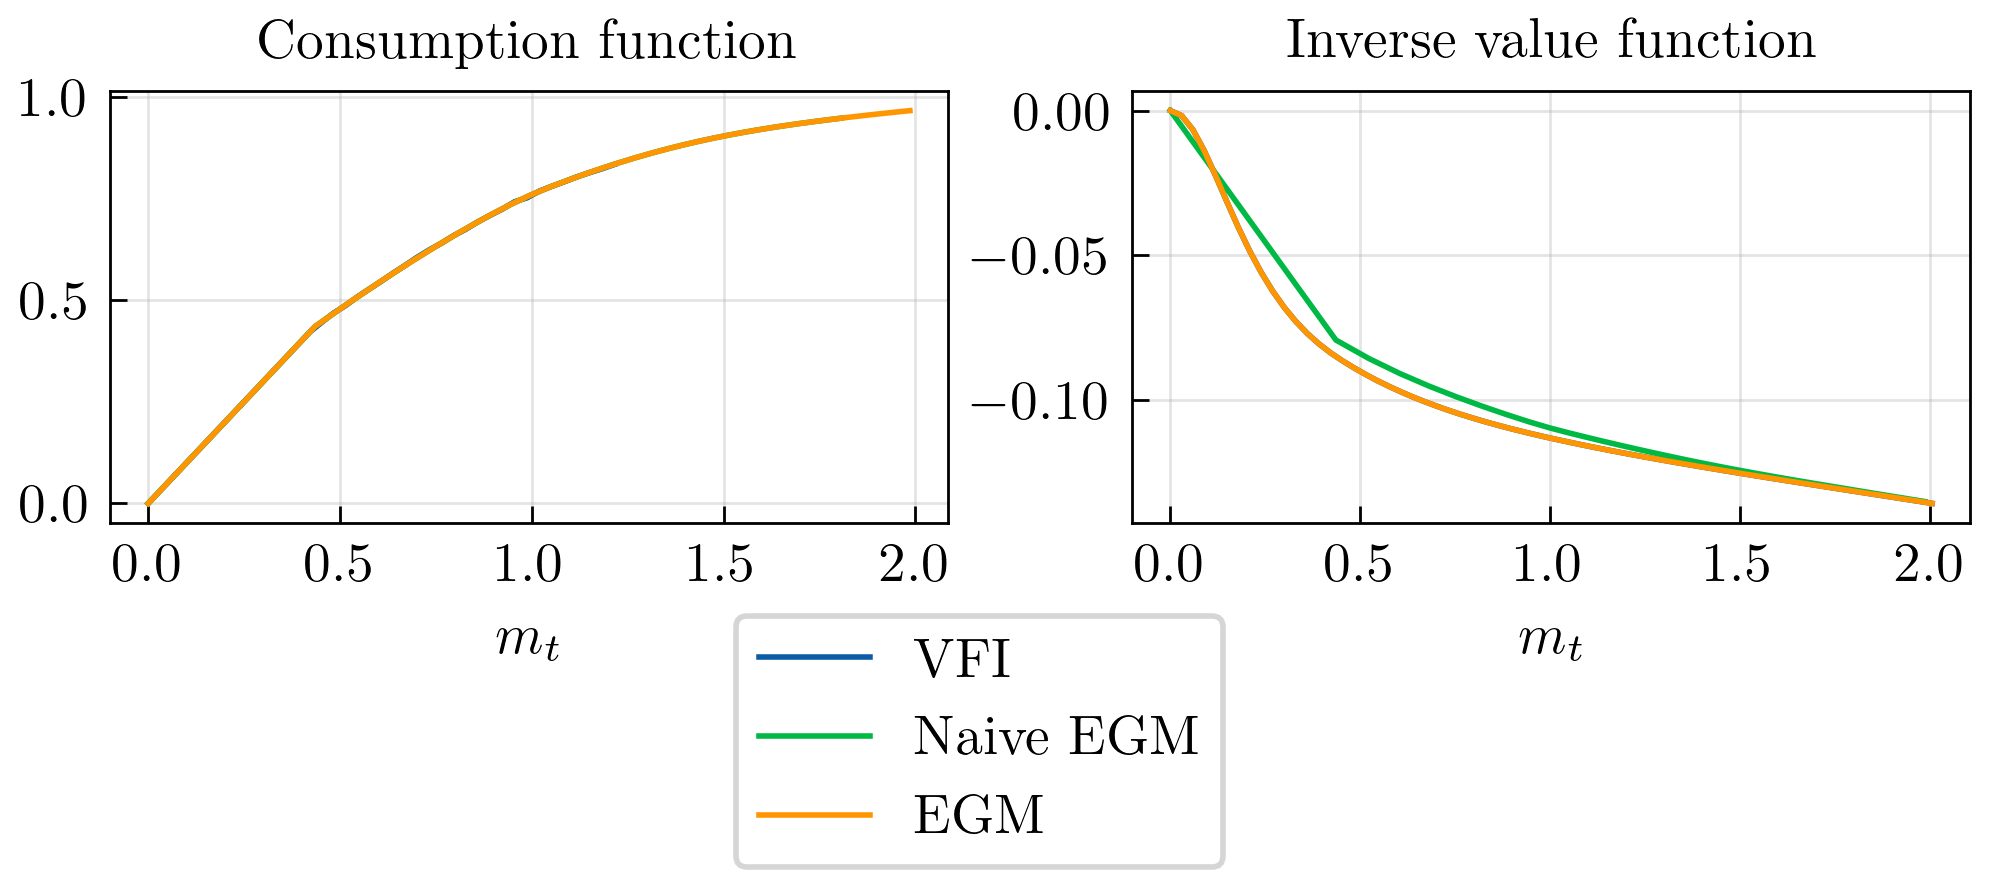

In [14]:
# Run models
par = par_class()
if fast:
    par.Nm = 50
    par.Na = 50
    par.Nh = 10
par.simN = 1
sol, sim = run_model(par)
sol_egm, sim_egm = model_egm.run_model(par)
sol_egm_naive, sim_egm_naive = model_egm_naive.run_model(par)

# Plot value functions
t = par.TR-3
z = 0
i_h = 9
grid_m = tools.nonlinspace(1e-6,par.m_max,par.Nm,par.m_phi)
fig,ax = plt.subplots(1,2,figsize=(6,2.25),dpi=dpi)
ax[0].plot(grid_m[:40], sol.c[t,:40,z,i_h], label='VFI')
ax[0].plot(sol_egm_naive.m[t,:30,z,i_h], sol_egm_naive.c[t,:30,z,i_h], label='Naive EGM')
ax[0].plot(sol_egm.m[t,:35,z,i_h], sol_egm.c[t,:35,z,i_h], label='EGM')
ax[1].plot(grid_m[:63], sol.inv_v[t,:63,z,i_h], label='VFI')
ax[1].plot(sol_egm_naive.m[t,:35,z,i_h], sol_egm_naive.inv_v[t,:35,z,i_h], label='Naive EGM')
ax[1].plot(grid_m[:63], sol_egm.inv_v[t,:63,z,i_h], label='EGM')
ax[0].set_title('Consumption function', fontsize=10)
ax[1].set_title('Inverse value function', fontsize=10)
ax[0].grid(alpha=1/3)
ax[1].grid(alpha=1/3)
ax[0].minorticks_off()
ax[1].minorticks_off()
ax[0].tick_params(top=False, right=False)
ax[1].tick_params(top=False, right=False)
ax[0].set_xlabel(r'$m_t$')
ax[1].set_xlabel(r'$m_t$')
fig.subplots_adjust(wspace=0.22)
fig.subplots_adjust(bottom=0.4)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.37,0.02), frameon=True)
if save: plt.savefig(r'figs\fig_naive_egm.pdf')

### Figure: Grid Illustration

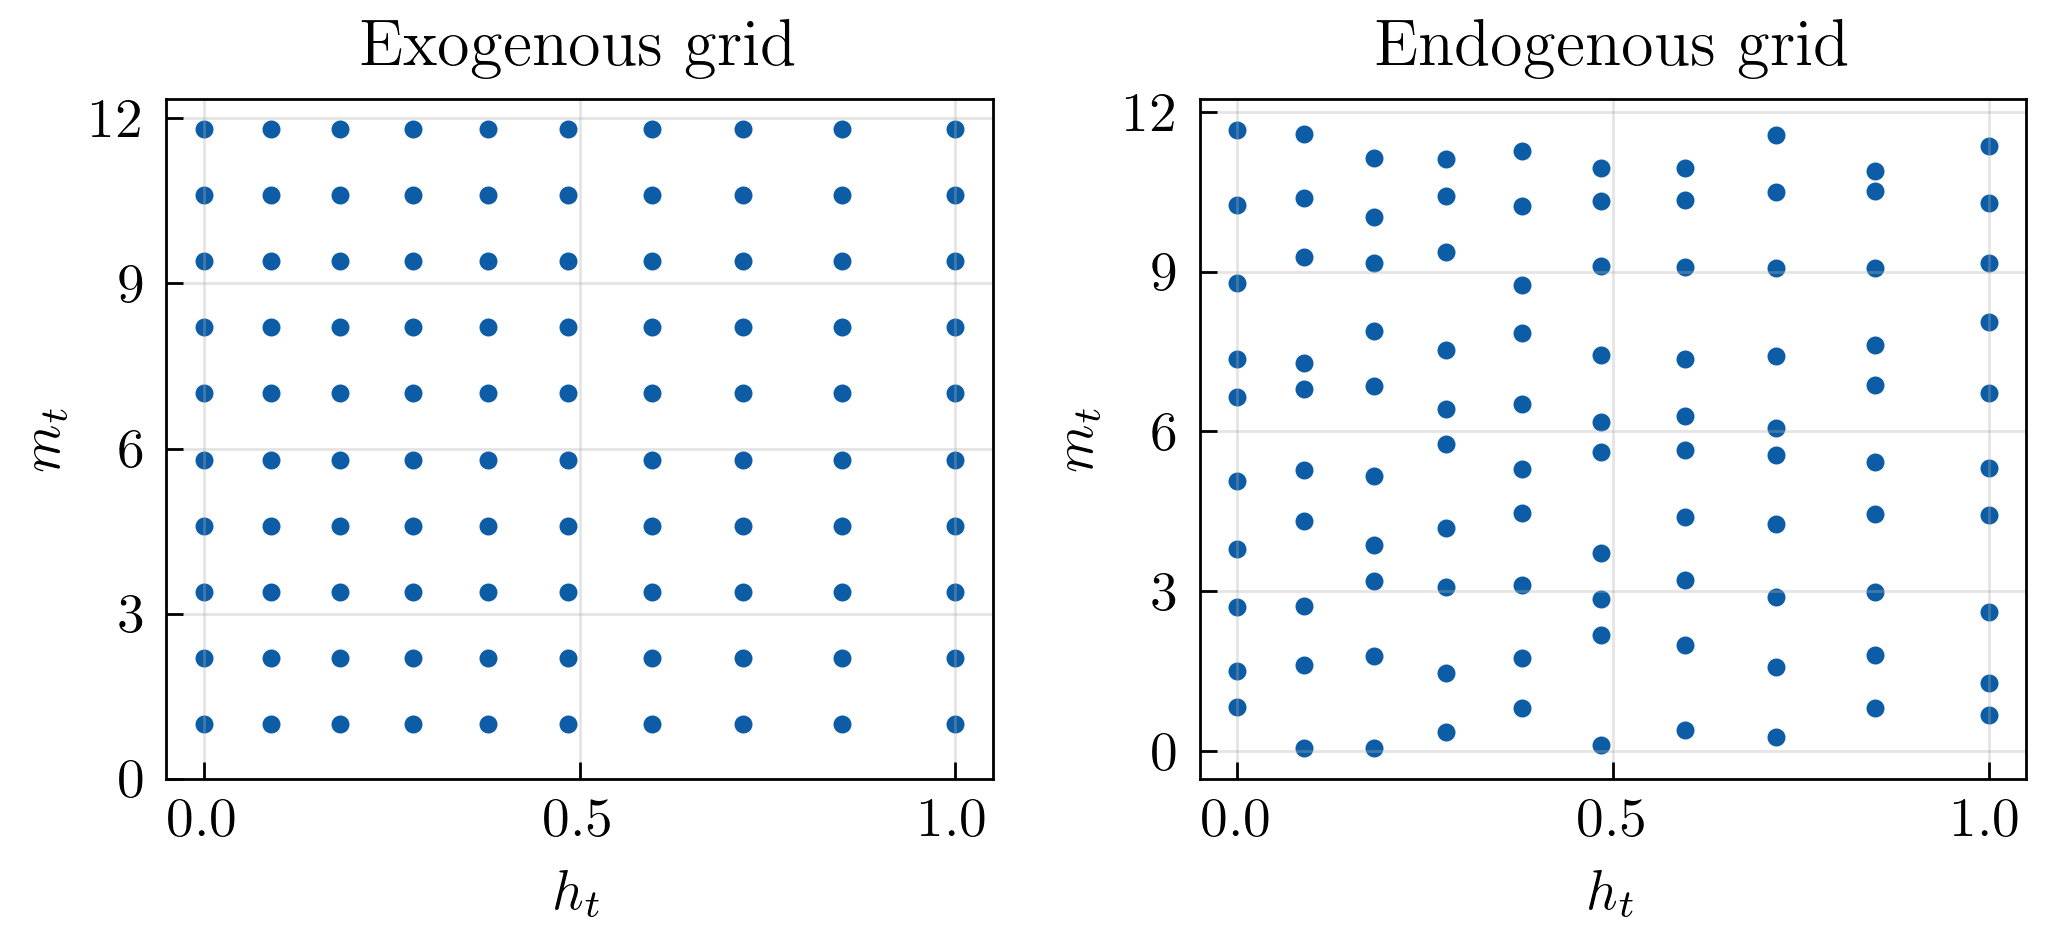

In [15]:
# Generate points
points_irregular = []
for h in tools.nonlinspace(0, 1, 10, 1.1):
    for i in range(10):
        m = np.random.uniform(1.2*i,1.2*i+1)
        point = [h, m]
        points_irregular.append(point)
x_irregular = [point[0] for point in points_irregular]
y_irregular = [point[1] for point in points_irregular]

# Generate points
points_regular = []
for h in tools.nonlinspace(0, 1, 10, 1.1):
    for i in range(10):
        m = 1.2*i+1
        point = [h, m]
        points_regular.append(point)
x_regular = [point[0] for point in points_regular]
y_regular = [point[1] for point in points_regular]

fig,ax = plt.subplots(1,2,figsize=(6,2.25),dpi=dpi)
ax[0].scatter(x_regular, y_regular, s=5)
ax[1].scatter(x_irregular, y_irregular, s=5)
ax[0].set_title('Exogenous grid')
ax[1].set_title('Endogenous grid')
ax[0].grid(alpha=1/3)
ax[1].grid(alpha=1/3)
ax[0].minorticks_off()
ax[1].minorticks_off()
ax[0].tick_params(top=False, right=False)
ax[1].tick_params(top=False, right=False)
ax[0].yaxis.set_ticks([0,3,6,9,12])
ax[1].yaxis.set_ticks([0,3,6,9,12])
ax[0].set_xlabel(r'$h_t$')
ax[1].set_xlabel(r'$h_t$')
ax[0].set_ylabel(r'$m_t$')
ax[1].set_ylabel(r'$m_t$')
fig.subplots_adjust(wspace=0.25)
if save: plt.savefig(r'figs\fig_grids.pdf')

### Calculation: Euler errors

In [16]:
# Solve and simulate model
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
sol, sim = run_model(par)

# Prepare grids and allocate solution
# Gauss Hermite
psi, psi_w = tools.GaussHermite_lognorm(sigma=par.sigma_psi,n=par.Npsi)
xi, xi_w = tools.GaussHermite_lognorm(sigma=par.sigma_xi,n=par.Nxi)
d, d_w = tools.GaussHermite_lognorm(sigma=par.sigma_d, n=par.Nd)

# Add low income shock to xi
if par.pi > 0:
    # Weights
    xi_w *= (1.0-par.pi)
    xi_w = np.insert(xi_w,0,par.pi)

    # Values
    xi = (xi-par.mu*par.pi)/(1.0-par.pi)
    xi = np.insert(xi,0,par.mu)

# Vectorize tensor product of shocks and total weight
psi_vec,xi_vec,d_vec = np.meshgrid(psi,xi,d,indexing='ij')
psi_w_vec,xi_w_vec,d_w_vec = np.meshgrid(psi_w,xi_w,d_w,indexing='ij')

par.psi_vec = psi_vec.ravel()
par.xi_vec = xi_vec.ravel()
par.d_vec = d_vec.ravel()
par.w = xi_w_vec.ravel()*psi_w_vec.ravel()*d_w_vec.ravel()

# Create m-grid
grid_m = tools.nonlinspace(1e-6,par.m_max,par.Nm,par.m_phi)

# Calculate euler errors
euler_error, nom_euler_error = calculate_euler_errors(sol,sim,par,grid_m)
print(f'Euler error:       {euler_error:.3f}')
print(f'Nom. Euler error: {nom_euler_error:.3f}')
print(f'Error per 100:     {10**nom_euler_error*100:.3f}')

Euler error:       0.054
Nom. Euler error: -3.308
Error per 100:     0.049


### Robustness checks

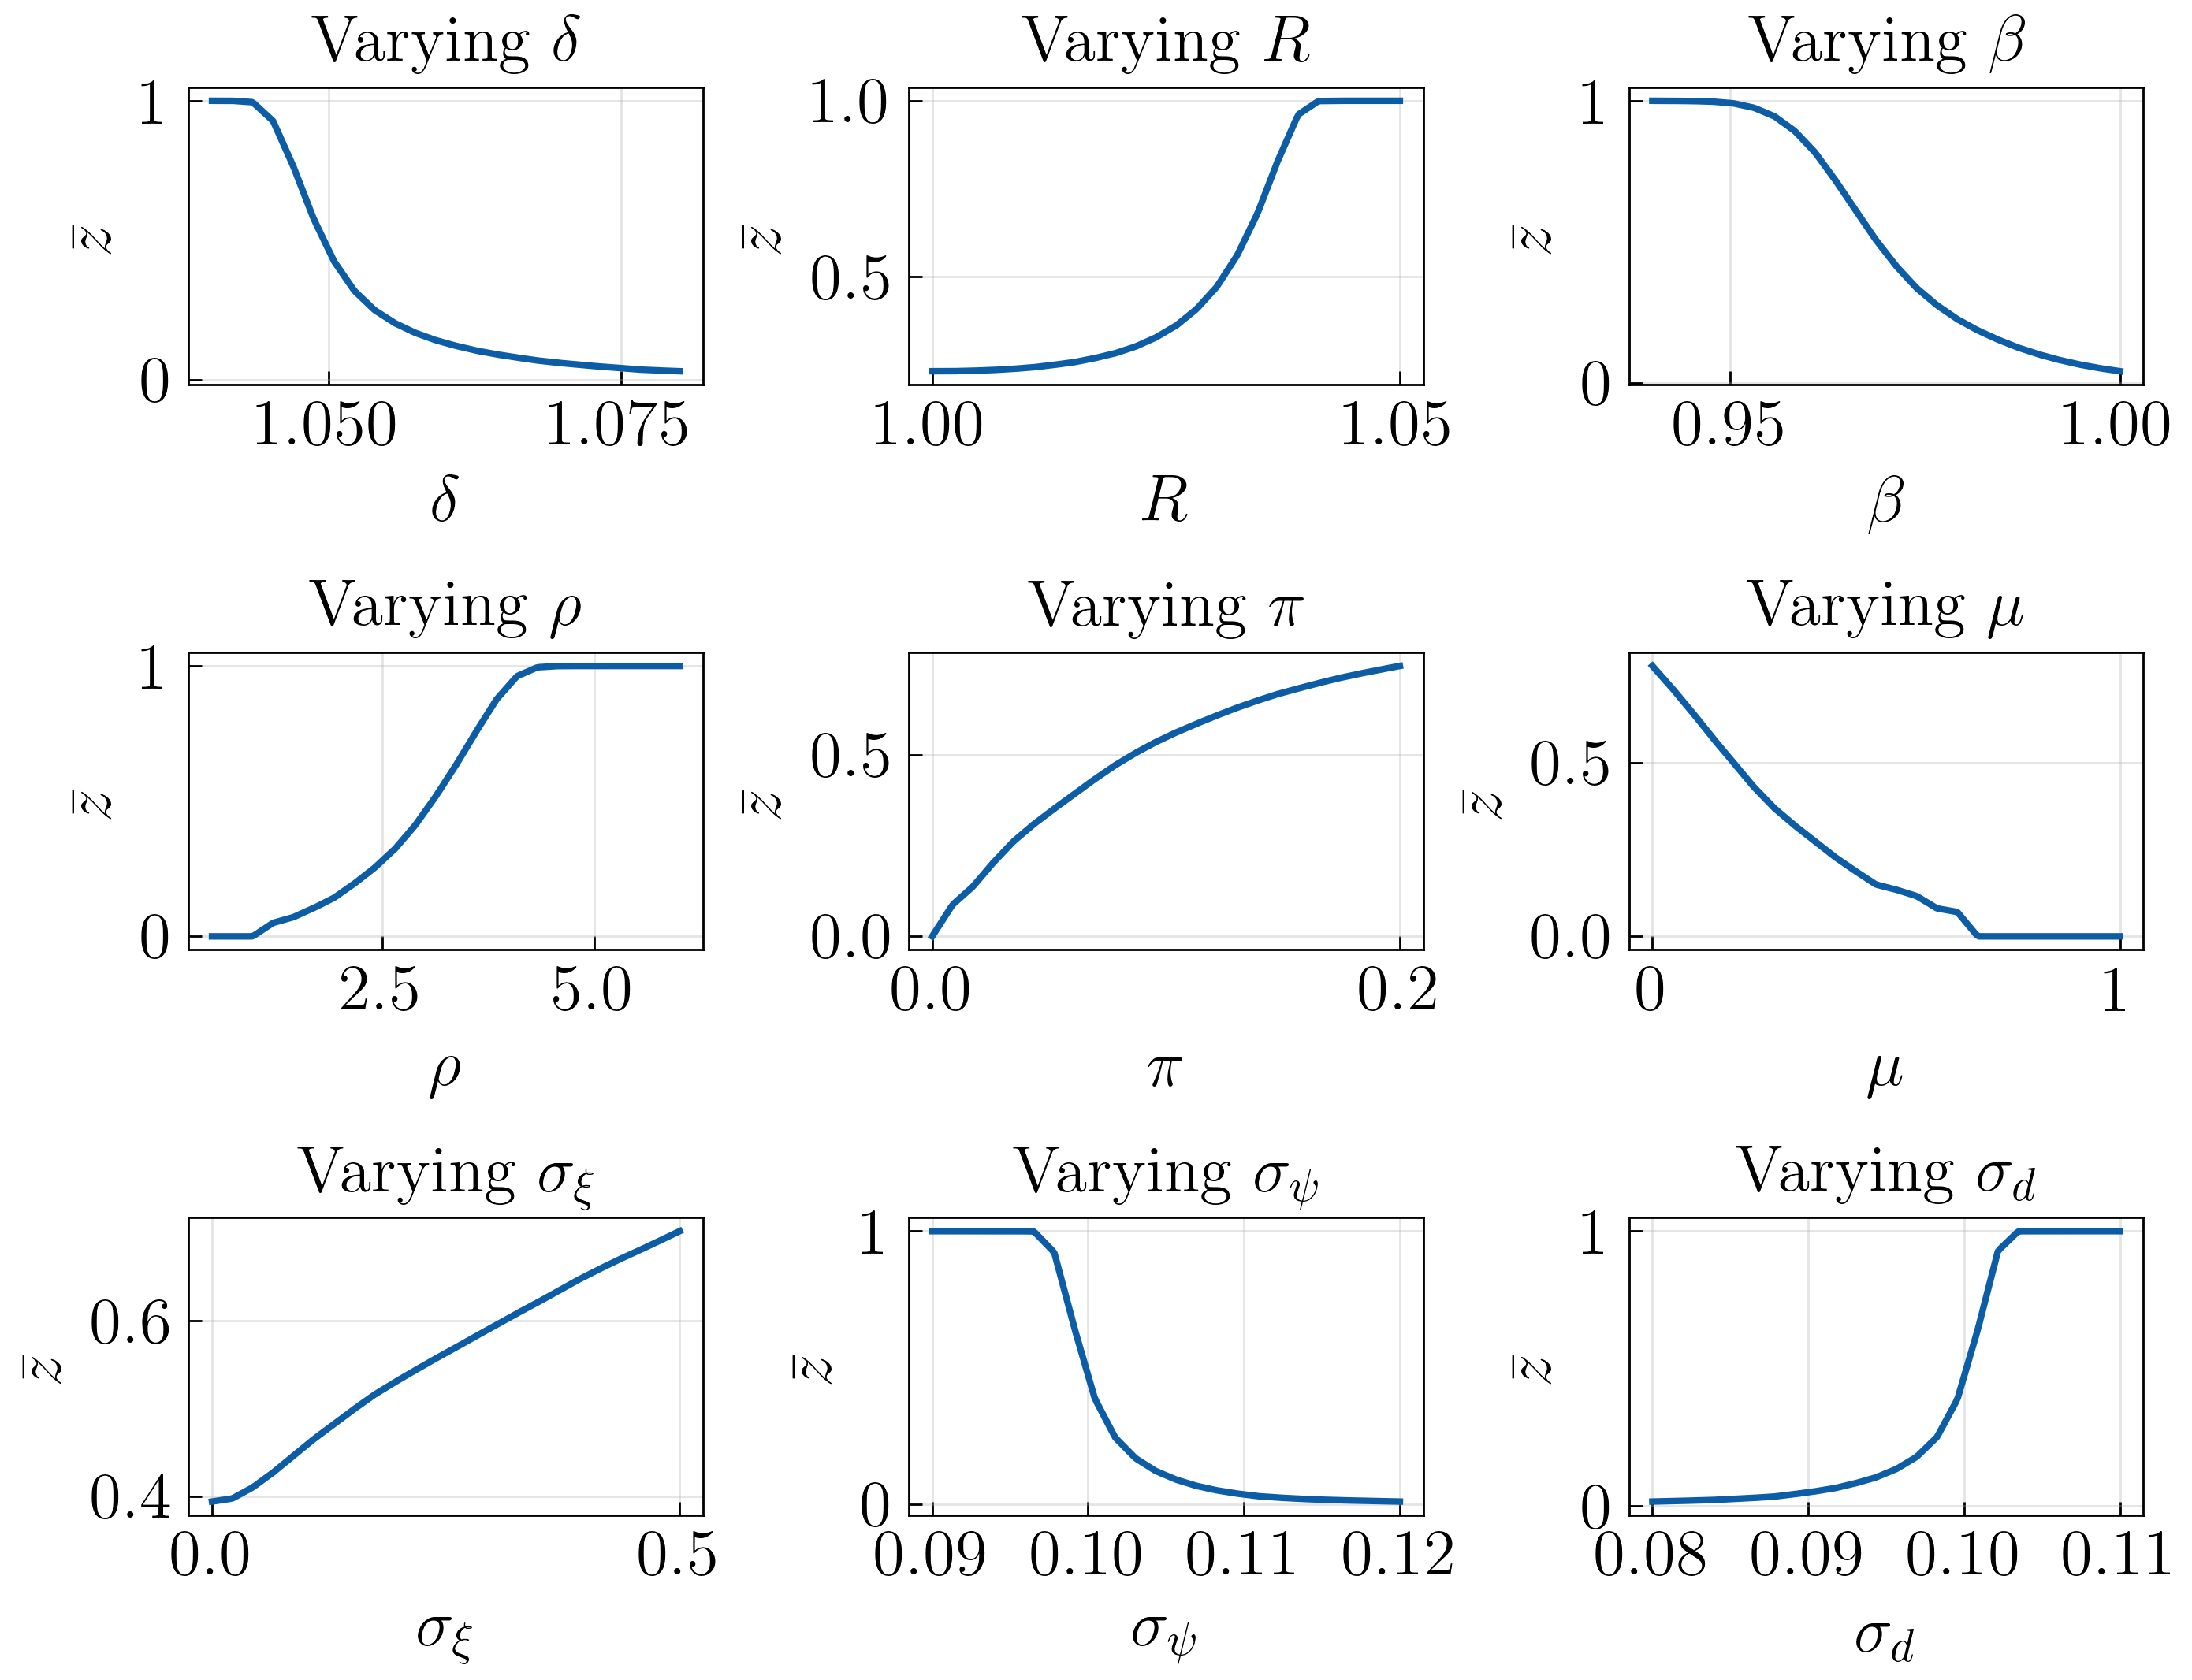

In [17]:
# Create figure
plt.rcParams.update({'font.size': 15})
lw = 1.5
fig,ax = plt.subplots(3,3,figsize=(8,6),dpi=dpi)

# Vary beta
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
beta_min = 0.94
beta_max = 1.00
zs = []
betas = np.linspace(beta_min, beta_max, num_points)
for beta in betas:
    par.beta = beta
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(betas, zs, kind='linear')
betas_interp = np.linspace(beta_min, beta_max, num=200, endpoint=True)
zs_interp = interpolator(betas_interp)
ax[0,2].plot(betas_interp,zs_interp,lw=lw)
ax[0,2].grid(alpha=1/3)
ax[0,2].minorticks_off()
ax[0,2].tick_params(top=False, right=False)
ax[0,2].set_title(r'Varying $\beta$', fontsize=15)
ax[0,2].set_xlabel(r'$\beta$')
ax[0,2].set_ylabel(r'$\bar{z}$')

# Vary rho
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
rho_min = 0.5
rho_max = 6.0
zs = []
rhos = np.linspace(rho_min, rho_max, num_points)
for rho in rhos:
    par.rho = rho
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(rhos, zs, kind='linear')
rhos_interp = np.linspace(rho_min, rho_max, num=200, endpoint=True)
zs_interp = interpolator(rhos_interp)
ax[1,0].plot(rhos_interp,zs_interp,lw=lw)
ax[1,0].grid(alpha=1/3)
ax[1,0].minorticks_off()
ax[1,0].tick_params(top=False, right=False)
ax[1,0].set_title(r'Varying $\rho$', fontsize=15)
ax[1,0].set_xlabel(r'$\rho$')
ax[1,0].set_ylabel(r'$\bar{z}$')

# Vary R
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
R_min = 1.00
R_max = 1.05
zs = []
Rs = np.linspace(R_min, R_max, num_points)
for R in Rs:
    par.R = R
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(Rs, zs, kind='linear')
Rs_interp = np.linspace(R_min, R_max, num=200, endpoint=True)
zs_interp = interpolator(Rs_interp)
ax[0,1].plot(Rs_interp,zs_interp,lw=lw)
ax[0,1].grid(alpha=1/3)
ax[0,1].minorticks_off()
ax[0,1].tick_params(top=False, right=False)
ax[0,1].set_title(r'Varying $R$', fontsize=15)
ax[0,1].set_xlabel(r'$R$')
ax[0,1].set_ylabel(r'$\bar{z}$')

# Vary delta
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
delta_min = 1.04
delta_max = 1.08
zs = []
deltas = np.linspace(delta_min, delta_max, num_points)
for delta in deltas:
    par.delta = delta
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(deltas, zs, kind='linear')
deltas_interp = np.linspace(delta_min, delta_max, num=200, endpoint=True)
zs_interp = interpolator(deltas_interp)
ax[0,0].plot(deltas_interp,zs_interp,lw=lw)
ax[0,0].grid(alpha=1/3)
ax[0,0].minorticks_off()
ax[0,0].tick_params(top=False, right=False)
ax[0,0].set_title(r'Varying $\delta$', fontsize=15)
ax[0,0].set_xlabel(r'$\delta$')
ax[0,0].set_ylabel(r'$\bar{z}$')

# Vary pi
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
pi_min = 0.00
pi_max = 0.20
zs = []
pis = np.linspace(pi_min, pi_max, num_points)
for pi in pis:
    par.pi = pi
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(pis, zs, kind='linear')
pis_interp = np.linspace(pi_min, pi_max, num=200, endpoint=True)
zs_interp = interpolator(pis_interp)
ax[1,1].plot(pis_interp,zs_interp,lw=lw)
ax[1,1].grid(alpha=1/3)
ax[1,1].minorticks_off()
ax[1,1].tick_params(top=False, right=False)
ax[1,1].set_title(r'Varying $\pi$', fontsize=15)
ax[1,1].set_xlabel(r'$\pi$')
ax[1,1].set_ylabel(r'$\bar{z}$')

# Vary mu
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
mu_min = 0.0
mu_max = 1.0
zs = []
mus = np.linspace(mu_min, mu_max, num_points)
for mu in mus:
    par.mu = mu
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(mus, zs, kind='linear')
mus_interp = np.linspace(mu_min, mu_max, num=200, endpoint=True)
zs_interp = interpolator(mus_interp)
ax[1,2].plot(mus_interp,zs_interp,lw=lw)
ax[1,2].grid(alpha=1/3)
ax[1,2].minorticks_off()
ax[1,2].tick_params(top=False, right=False)
ax[1,2].set_title(r'Varying $\mu$', fontsize=15)
ax[1,2].set_xlabel(r'$\mu$')
ax[1,2].set_ylabel(r'$\bar{z}$')

# Vary sigma_xi
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
sigma_xi_min = 0.0
sigma_xi_max = 0.5
zs = []
sigma_xis = np.linspace(sigma_xi_min, sigma_xi_max, num_points)
for sigma_xi in sigma_xis:
    par.sigma_xi = sigma_xi
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(sigma_xis, zs, kind='linear')
sigma_xis_interp = np.linspace(sigma_xi_min, sigma_xi_max, num=200, endpoint=True)
zs_interp = interpolator(sigma_xis_interp)
ax[2,0].plot(sigma_xis_interp,zs_interp,lw=lw)
ax[2,0].grid(alpha=1/3)
ax[2,0].minorticks_off()
ax[2,0].tick_params(top=False, right=False)
ax[2,0].set_title(r'Varying $\sigma_{\xi}$', fontsize=15)
ax[2,0].set_xlabel(r'$\sigma_{\xi}$')
ax[2,0].set_ylabel(r'$\bar{z}$')

# Vary sigma_psi
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
sigma_psi_min = 0.09
sigma_psi_max = 0.12
zs = []
sigma_psis = np.linspace(sigma_psi_min, sigma_psi_max, num_points)
for sigma_psi in sigma_psis:
    par.sigma_psi = sigma_psi
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(sigma_psis, zs, kind='linear')
sigma_psis_interp = np.linspace(sigma_psi_min, sigma_psi_max, num=200, endpoint=True)
zs_interp = interpolator(sigma_psis_interp)
ax[2,1].plot(sigma_psis_interp,zs_interp,lw=lw)
ax[2,1].grid(alpha=1/3)
ax[2,1].minorticks_off()
ax[2,1].tick_params(top=False, right=False)
ax[2,1].xaxis.set_ticks(np.arange(sigma_psi_min, sigma_psi_max+0.005, 0.01))
ax[2,1].set_title(r'Varying $\sigma_{\psi}$', fontsize=15)
ax[2,1].set_xlabel(r'$\sigma_{\psi}$')
ax[2,1].set_ylabel(r'$\bar{z}$')

# Vary sigma_d
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
sigma_d_min = 0.08
sigma_d_max = 0.11
zs = []
sigma_ds = np.linspace(sigma_d_min, sigma_d_max, num_points)
for sigma_d in sigma_ds:
    par.sigma_d = sigma_d
    _, sim = run_model(par)
    zs.append(sim.z.mean())
interpolator = interp1d(sigma_ds, zs, kind='linear')
sigma_ds_interp = np.linspace(sigma_d_min, sigma_d_max, num=200, endpoint=True)
zs_interp = interpolator(sigma_ds_interp)
ax[2,2].plot(sigma_ds_interp,zs_interp,lw=lw)
ax[2,2].grid(alpha=1/3)
ax[2,2].minorticks_off()
ax[2,2].tick_params(top=False, right=False)
ax[2,2].xaxis.set_ticks(np.arange(sigma_d_min, sigma_d_max+0.01, 0.01))
ax[2,2].set_title(r'Varying $\sigma_d$', fontsize=15)
ax[2,2].set_xlabel(r'$\sigma_d$')
ax[2,2].set_ylabel(r'$\bar{z}$')

# Do adjustments
fig.subplots_adjust(hspace=0.9)
fig.subplots_adjust(wspace=0.4)

# Save figure
if save: plt.savefig(r'figs\fig_robustness.pdf')